# Predicting Housing Prices in Ames, Iowa

## Introduction 

When a person is thinking about what house to buy, what are the features that come to mind? Some people want to make sure that they have a basement. Some want to make sure that they have multiple rooms. Some want to make sure that they have multiple bathrooms. Of course, there is the real estate mantra that all that matters is "Location. Location. Location." The objective of this report is to explore what features drive the Sale Price of a house the most. 

## Initial Data Exploration

When doing analysis with python, the first step is to load the modules that will be used. Some of the main modules are pandas which is used to manipulate datasets, numpy which is useful for some mathematical computations, matplotlib which is used for graphing and sklearn which is used for predictive modeling after the data is preprocessed.

Of course, no data can be analyzed if there is no data present. So, the first step in analyzing the data is to load the data. The data for this report is split between a train set and a test set. The train and the test set are combined into a data set and stored in a variable called houses_full. The train and the test are combined so that when variables are transformed and engineered, they will be transformed in both the train sets and the test sets. The train set contains the data of 81 different featuress for 1460 houses. The test set contains the data for 1461 houses containing the same features. Some of the features for these houses include the square footage of the entire house, the square footage of each floor including the basement if there's a basement, the number of fireplaces, the neighborhood, and the size of the garage if the house has one. All attributes are available in the Appendix #1c-e. 

Further exploration reveals that both the train and test sets have missing values. However, most of these missing value are for features such as pool and fence. The obvious reason that these values are missing for these features is that these houses don't have pools or fences. In Appendix #4 all missing values for categorical variables are replaced with the word "MISSING". Categorical variables are variables that are not represented by numbers. For example, the neighborhood where the house is located is a categorical variable. Unfortunately the test set contains missing numerical data for the Masonry Veneer Area variable. In Appendix #9b all missing numerical entries are replaced with the mean of the feature. 

## Transforming the Data

Unfortunately, in order to make accurate predictions on the test dataset, the data cannot be used in its original state. There are some necessary tranformations that need to made in order to give the most accurate predictions. So the first step in the data transformation is to transformed skewed variables. A skew can be seen in the target variable `SalePrice`. In the graph in Appendix #3a the positive skew is evident. The positive skew means that most of the prices for the houses are lower in price while there a smaller amount of home prices being more expensive. For analysis purposes in Appendix #3c, a log+1 transformation is applied to all numeric variables including the `SalePrice` variable. The result is that all numeric variables will be more normally distributed. This means that most home prices will have a middle value with the other prices being equally more expensive or less expensive. Essentially, the new numeric data is more evenly distributed. This effect can be seen on the `SalePrice` variable in Appendix #3d. 

The next step in the transformation is to change the categorical variables. So all variables that are not represented as a numeric value, will be converted to a numeric value. For example, the name of the neighborhood where the house is located will no longer be represented by a name. It will be represented as a number. This transformation is shown in Appendix #5. Not only are these variables converted to numbers, but they're labels now include `_E` in order to distinguish them from the original variables. The effect of the transformation is shown in Appendix #5a-3.

Once these transformations are complete, the next step in building a predictive model is to select the correct features from the dataset. The dataset starts with 81 different variables. However, not all of these variables will be helpful when trying to predict the price of a home. So correlations between the `SalePrice` variable and the other variables are checked, in order to discover which features will help predict the value of a home. The correlations between `SalePrice` and the other variables are shown in Appendix #6b - Appendix #6g. The top correlated categorical variables are shown in Appendix #6b, #6d and #6e. The top numerical variables are shown in Appendix #6c, #6f and #6g. These correlation tables show that the top correlated features are the overall quality of the house, the square footage of the living area, the neighborhood, the amount of cars that fit in the garage and lots of other features. The top 25 categorical features and the top 25 numerical features are selected from the full dataset, train set and test set. These are the variables that will be used when building the predictive model.

It would be great if all the variables that are present in the dataset are the only variables that would help predict home prices. Unfortunately some data will need to be "engineered" or created in order to create the most accurate model. Some of the features that can be created are created from some features that are collinear. Collinear features are features that pretty evenly move with the target variable. For example, the square footage of the first floor is generally close to the square footage of the second floor if there is one present. So the square footage of the first and second floor are said to be collinear. However, having a second floor may change the price of a house. Having a basement may change the price of the house as well. Appendix #7b shows the creation of features to show whether the house, has a basement, has a garage, has a second floor, has an open porch, has a screen porch, has a fire place, has a masonry veneer, has a wood deck, has a pool, has a basement bathroom, has an extra bathroom, or is new. 

With the data transformed, new data created, and the appropriate features selected, there is only one step left before the predictive models can be created. That is to remove outliers. Since, the square footage of the general living area is an important variable, it would be helpful to remove outliers. There are two obvious outliers, which can be seen in Appendix #8a. These outliers are removed and the data is ready for modeling.

## Predictive Modeling

The first step in creating the predictive model is to get dummy variables for the categorical features. Explaining a dummy variable is best done with an example. For the neighborhood variable, for example, each neighborhood becomes its own column. If the house is in that neighborhood, the dummy variable will show a 1. If the house is not in that neighborhood, the dummy variable will show a 0. This step is shown in Appendix #9a. Once the dummy variables are created, the data is partitioned. The data that is going to be used to build the model is stored in the variable `train_subset`. The data stored in this variable is separated into its own train set and test set. The train set contains 70% of the data in `train_subset` and will be used to build the model. The test set contains the remaining 30% of the data and will be used to test the model. 

Next four different machine learning algorithms are used to model the data. These models include a Linear Regression model, a Lasso model, a Ridge model and an ElasticNet model. Each of these models has a graph accompanying it, which compares the predictions with the actual selling price. The ElasticNet model is the final choice for making predictions on the competition test set. 

## Conclusion

After doing this thorough analysis on the housing data in Ames, Iowa, a few conclusions can be made. In the predictive modeling section of this report, the features that have the most effect on the price of a house can be determined. The graphs in Appendix #9 show which variables have the greatest impact. This analysis determined that the selling price of a home in Ames, Iowa is most influenced by the size of the general living area, whether the house has a basement, deck, second floor, extra bathrooms, a garage, a fire place or open porch, the size of additional floors and basements, and the overall quality of the house. Although the real estate agents are right when it comes to "Location. Location. Location," this analysis shows that there are more important criteria when determining the price of a house.

## Appendix 

### 1. Initial Data Exploration

#### 1a. Loading Modules

In [1660]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import StandardScaler
%matplotlib inline

#### 1b. Loading Data

In [1661]:
houses_train = pd.read_csv('train.csv')
houses_test = pd.read_csv('test.csv')
houses_full = houses_train.append(houses_test, ignore_index = True)
houses = houses_full[ :1460]
test = houses_full[1460: ]

#### 1c. Inspecting Data

##### 1c-1. Training Data

In [1662]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
3SsnPorch        1460 non-null int64
Alley            91 non-null object
BedroomAbvGr     1460 non-null int64
BldgType         1460 non-null object
BsmtCond         1423 non-null object
BsmtExposure     1422 non-null object
BsmtFinSF1       1460 non-null float64
BsmtFinSF2       1460 non-null float64
BsmtFinType1     1423 non-null object
BsmtFinType2     1422 non-null object
BsmtFullBath     1460 non-null float64
BsmtHalfBath     1460 non-null float64
BsmtQual         1423 non-null object
BsmtUnfSF        1460 non-null float64
CentralAir       1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
Electrical       1459 non-null object
EnclosedPorch    1460 non-null int64
ExterCond        1460 non-null object
ExterQual        1460 non-null object
Exterior1st      1460

##### 1c-2. Test Data

In [1663]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 1460 to 2918
Data columns (total 81 columns):
1stFlrSF         1459 non-null int64
2ndFlrSF         1459 non-null int64
3SsnPorch        1459 non-null int64
Alley            107 non-null object
BedroomAbvGr     1459 non-null int64
BldgType         1459 non-null object
BsmtCond         1414 non-null object
BsmtExposure     1415 non-null object
BsmtFinSF1       1458 non-null float64
BsmtFinSF2       1458 non-null float64
BsmtFinType1     1417 non-null object
BsmtFinType2     1417 non-null object
BsmtFullBath     1457 non-null float64
BsmtHalfBath     1457 non-null float64
BsmtQual         1415 non-null object
BsmtUnfSF        1458 non-null float64
CentralAir       1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
Electrical       1459 non-null object
EnclosedPorch    1459 non-null int64
ExterCond        1459 non-null object
ExterQual        1459 non-null object
Exterior1st      

##### 1c-3. Full Data Set

In [1664]:
houses_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

#### 1d. Viewing Numerical Data

##### 1d-1. Training Data

In [1665]:
houses.describe()

1stFlrSF     2ndFlrSF    3SsnPorch  BedroomAbvGr   BsmtFinSF1  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean   1162.626712   346.992466     3.409589      2.866438   443.639726   
std     386.587738   436.528436    29.317331      0.815778   456.098091   
min     334.000000     0.000000     0.000000      0.000000     0.000000   
25%     882.000000     0.000000     0.000000      2.000000     0.000000   
50%    1087.000000     0.000000     0.000000      3.000000   383.500000   
75%    1391.250000   728.000000     0.000000      3.000000   712.250000   
max    4692.000000  2065.000000   508.000000      8.000000  5644.000000   

        BsmtFinSF2  BsmtFullBath  BsmtHalfBath    BsmtUnfSF  EnclosedPorch  \
count  1460.000000   1460.000000   1460.000000  1460.000000    1460.000000   
mean     46.549315      0.425342      0.057534   567.240411      21.954110   
std     161.319273      0.518911      0.238753   441.866955      61.119149   
min       0.000000      0.000000      0.000000     0.000000       0.000000   
25%       0.000000      0.000000      0.000000   223.000000       0.000000   
50%       0.000000      0.000000      0.000000   477.500000       0.000000   
75%       0.000000      1.000000      0.000000   808.000000       0.000000   
max    1474.000000      3.000000      2.000000  2336.000000     552.000000   

          ...       OverallQual     PoolArea      SalePrice  ScreenPorch  \
count     ...       1460.000000  1460.000000    1460.000000  1460.000000   
mean      ...          6.099315     2.758904  180921.195890    15.060959   
std       ...          1.382997    40.177307   79442.502883    55.757415   
min       ...          1.000000     0.000000   34900.000000     0.000000   
25%       ...          5.000000     0.000000  129975.000000     0.000000   
50%       ...          6.000000     0.000000  163000.000000     0.000000   
75%       ...          7.000000     0.000000  214000.000000     0.000000   
max       ...         10.000000   738.000000  755000.000000   480.000000   

       TotRmsAbvGrd  TotalBsmtSF   WoodDeckSF    YearBuilt  YearRemodAdd  \
count   1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean       6.517808  1057.429452    94.244521  1971.267808   1984.865753   
std        1.625393   438.705324   125.338794    30.202904     20.645407   
min        2.000000     0.000000     0.000000  1872.000000   1950.000000   
25%        5.000000   795.750000     0.000000  1954.000000   1967.000000   
50%        6.000000   991.500000     0.000000  1973.000000   1994.000000   
75%        7.000000  1298.250000   168.000000  2000.000000   2004.000000   
max       14.000000  6110.000000   857.000000  2010.000000   2010.000000   

            YrSold  
count  1460.000000  
mean   2007.815753  
std       1.328095  
min    2006.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2010.000000  

[8 rows x 38 columns]

##### 1d-2. Test Data

In [1666]:
test.describe()

1stFlrSF     2ndFlrSF    3SsnPorch  BedroomAbvGr   BsmtFinSF1  \
count  1459.000000  1459.000000  1459.000000   1459.000000  1458.000000   
mean   1156.534613   325.967786     1.794380      2.854010   439.203704   
std     398.165820   420.610226    20.207842      0.829788   455.268042   
min     407.000000     0.000000     0.000000      0.000000     0.000000   
25%     873.500000     0.000000     0.000000      2.000000     0.000000   
50%    1079.000000     0.000000     0.000000      3.000000   350.500000   
75%    1382.500000   676.000000     0.000000      3.000000   753.500000   
max    5095.000000  1862.000000   360.000000      6.000000  4010.000000   

        BsmtFinSF2  BsmtFullBath  BsmtHalfBath    BsmtUnfSF  EnclosedPorch  \
count  1458.000000   1457.000000   1457.000000  1458.000000    1459.000000   
mean     52.619342      0.434454      0.065202   554.294925      24.243317   
std     176.753926      0.530648      0.252468   437.260486      67.227765   
min       0.000000      0.000000      0.000000     0.000000       0.000000   
25%       0.000000      0.000000      0.000000   219.250000       0.000000   
50%       0.000000      0.000000      0.000000   460.000000       0.000000   
75%       0.000000      1.000000      0.000000   797.750000       0.000000   
max    1526.000000      3.000000      2.000000  2140.000000    1012.000000   

          ...       OverallQual     PoolArea  SalePrice  ScreenPorch  \
count     ...       1459.000000  1459.000000        0.0  1459.000000   
mean      ...          6.078821     1.744345        NaN    17.064428   
std       ...          1.436812    30.491646        NaN    56.609763   
min       ...          1.000000     0.000000        NaN     0.000000   
25%       ...          5.000000     0.000000        NaN     0.000000   
50%       ...          6.000000     0.000000        NaN     0.000000   
75%       ...          7.000000     0.000000        NaN     0.000000   
max       ...         10.000000   800.000000        NaN   576.000000   

       TotRmsAbvGrd  TotalBsmtSF   WoodDeckSF    YearBuilt  YearRemodAdd  \
count   1459.000000  1458.000000  1459.000000  1459.000000   1459.000000   
mean       6.385195  1046.117970    93.174777  1971.357779   1983.662783   
std        1.508895   442.898624   127.744882    30.390071     21.130467   
min        3.000000     0.000000     0.000000  1879.000000   1950.000000   
25%        5.000000   784.000000     0.000000  1953.000000   1963.000000   
50%        6.000000   988.000000     0.000000  1973.000000   1992.000000   
75%        7.000000  1305.000000   168.000000  2001.000000   2004.000000   
max       15.000000  5095.000000  1424.000000  2010.000000   2010.000000   

            YrSold  
count  1459.000000  
mean   2007.769705  
std       1.301740  
min    2006.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2010.000000  

[8 rows x 38 columns]

##### 1d-3. Full Data Set

In [1667]:
houses_full.describe()

1stFlrSF     2ndFlrSF    3SsnPorch  BedroomAbvGr   BsmtFinSF1  \
count  2919.000000  2919.000000  2919.000000   2919.000000  2918.000000   
mean   1159.581706   336.483727     2.602261      2.860226   441.423235   
std     392.362079   428.701456    25.188169      0.822693   455.610826   
min     334.000000     0.000000     0.000000      0.000000     0.000000   
25%     876.000000     0.000000     0.000000      2.000000     0.000000   
50%    1082.000000     0.000000     0.000000      3.000000   368.500000   
75%    1387.500000   704.000000     0.000000      3.000000   733.000000   
max    5095.000000  2065.000000   508.000000      8.000000  5644.000000   

        BsmtFinSF2  BsmtFullBath  BsmtHalfBath    BsmtUnfSF  EnclosedPorch  \
count  2918.000000   2917.000000   2917.000000  2918.000000    2919.000000   
mean     49.582248      0.429894      0.061364   560.772104      23.098321   
std     169.205611      0.524736      0.245687   439.543659      64.244246   
min       0.000000      0.000000      0.000000     0.000000       0.000000   
25%       0.000000      0.000000      0.000000   220.000000       0.000000   
50%       0.000000      0.000000      0.000000   467.000000       0.000000   
75%       0.000000      1.000000      0.000000   805.500000       0.000000   
max    1526.000000      3.000000      2.000000  2336.000000    1012.000000   

          ...       OverallQual     PoolArea      SalePrice  ScreenPorch  \
count     ...       2919.000000  2919.000000    1460.000000  2919.000000   
mean      ...          6.089072     2.251799  180921.195890    16.062350   
std       ...          1.409947    35.663946   79442.502883    56.184365   
min       ...          1.000000     0.000000   34900.000000     0.000000   
25%       ...          5.000000     0.000000  129975.000000     0.000000   
50%       ...          6.000000     0.000000  163000.000000     0.000000   
75%       ...          7.000000     0.000000  214000.000000     0.000000   
max       ...         10.000000   800.000000  755000.000000   576.000000   

       TotRmsAbvGrd  TotalBsmtSF   WoodDeckSF    YearBuilt  YearRemodAdd  \
count   2919.000000  2918.000000  2919.000000  2919.000000   2919.000000   
mean       6.451524  1051.777587    93.709832  1971.312778   1984.264474   
std        1.569379   440.766258   126.526589    30.291442     20.894344   
min        2.000000     0.000000     0.000000  1872.000000   1950.000000   
25%        5.000000   793.000000     0.000000  1953.500000   1965.000000   
50%        6.000000   989.500000     0.000000  1973.000000   1993.000000   
75%        7.000000  1302.000000   168.000000  2001.000000   2004.000000   
max       15.000000  6110.000000  1424.000000  2010.000000   2010.000000   

            YrSold  
count  2919.000000  
mean   2007.792737  
std       1.314964  
min    2006.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2010.000000  

[8 rows x 38 columns]

#### 1e. Top Rows of Data

In [1668]:
houses.head(10)

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
0       856       854          0   NaN             3     1Fam       TA   
1      1262         0          0   NaN             3     1Fam       TA   
2       920       866          0   NaN             3     1Fam       TA   
3       961       756          0   NaN             3     1Fam       Gd   
4      1145      1053          0   NaN             4     1Fam       TA   
5       796       566        320   NaN             1     1Fam       TA   
6      1694         0          0   NaN             3     1Fam       TA   
7      1107       983          0   NaN             3     1Fam       TA   
8      1022       752          0   NaN             2     1Fam       TA   
9      1077         0          0   NaN             2   2fmCon       TA   

  BsmtExposure  BsmtFinSF1  BsmtFinSF2  ...   SaleType ScreenPorch  Street  \
0           No       706.0         0.0  ...         WD           0    Pave   
1           Gd       978.0         0.0  ...         WD           0    Pave   
2           Mn       486.0         0.0  ...         WD           0    Pave   
3           No       216.0         0.0  ...         WD           0    Pave   
4           Av       655.0         0.0  ...         WD           0    Pave   
5           No       732.0         0.0  ...         WD           0    Pave   
6           Av      1369.0         0.0  ...         WD           0    Pave   
7           Mn       859.0        32.0  ...         WD           0    Pave   
8           No         0.0         0.0  ...         WD           0    Pave   
9           No       851.0         0.0  ...         WD           0    Pave   

   TotRmsAbvGrd TotalBsmtSF  Utilities WoodDeckSF YearBuilt YearRemodAdd  \
0             8       856.0     AllPub          0      2003         2003   
1             6      1262.0     AllPub        298      1976         1976   
2             6       920.0     AllPub          0      2001         2002   
3             7       756.0     AllPub          0      1915         1970   
4             9      1145.0     AllPub        192      2000         2000   
5             5       796.0     AllPub         40      1993         1995   
6             7      1686.0     AllPub        255      2004         2005   
7             7      1107.0     AllPub        235      1973         1973   
8             8       952.0     AllPub         90      1931         1950   
9             5       991.0     AllPub          0      1939         1950   

  YrSold  
0   2008  
1   2007  
2   2008  
3   2006  
4   2008  
5   2009  
6   2007  
7   2009  
8   2008  
9   2008  

[10 rows x 81 columns]

### 2. Finding Missing Values

#### 2a. Train Set

In [1669]:
train_nan = houses.isnull().sum().sort_values(ascending=False)
percent_nan = (houses.isnull().sum()/houses.isnull().count()).sort_values(ascending=False)
missing_table = pd.concat([train_nan, percent_nan], axis=1, keys=['Total', 'Percent'])
missing_table.head(25)

Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageFinish     81  0.055479
GarageCond       81  0.055479
GarageYrBlt      81  0.055479
GarageQual       81  0.055479
GarageType       81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtCond         37  0.025342
BsmtFinType1     37  0.025342
BsmtQual         37  0.025342
MasVnrArea        8  0.005479
MasVnrType        8  0.005479
Electrical        1  0.000685
Condition1        0  0.000000
Condition2        0  0.000000
2ndFlrSF          0  0.000000
3SsnPorch         0  0.000000
BedroomAbvGr      0  0.000000
GarageCars        0  0.000000

#### 2b. Test Set

In [1670]:
test_nan = test.isnull().sum().sort_values(ascending=False)
percent_nan = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_table = pd.concat([test_nan, percent_nan], axis=1, keys=['Total', 'Percent'])
missing_table.head(25)

Total   Percent
SalePrice      1459  1.000000
PoolQC         1456  0.997944
MiscFeature    1408  0.965045
Alley          1352  0.926662
Fence          1169  0.801234
FireplaceQu     730  0.500343
LotFrontage     227  0.155586
GarageYrBlt      78  0.053461
GarageQual       78  0.053461
GarageFinish     78  0.053461
GarageCond       78  0.053461
GarageType       76  0.052090
BsmtCond         45  0.030843
BsmtQual         44  0.030158
BsmtExposure     44  0.030158
BsmtFinType2     42  0.028787
BsmtFinType1     42  0.028787
MasVnrType       16  0.010966
MasVnrArea       15  0.010281
MSZoning          4  0.002742
BsmtFullBath      2  0.001371
BsmtHalfBath      2  0.001371
Functional        2  0.001371
Utilities         2  0.001371
Exterior2nd       1  0.000685

### 3. Transforming Skewed Data

#### 3a. Sale Price Distribution

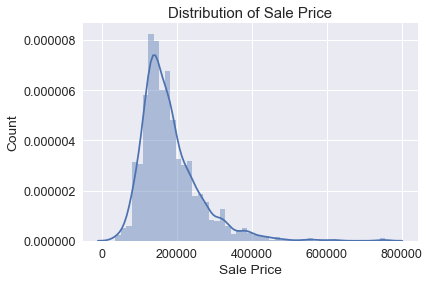

In [1671]:
ax = sns.distplot(houses['SalePrice'])
ax.set_xlabel('Sale Price')
ax.set_ylabel('Count')
ax.set_title('Distribution of Sale Price')
plt.show()

#### 3b. Separating Variables

In [1672]:
categorical = houses_full.select_dtypes(include = ['object']).columns
numerical = houses_full.select_dtypes(exclude = ["object"]).columns
numerical = numerical.drop('Id')
print('Categorical: ' + str(len(categorical)))
print('Numerical: ' + str(len(numerical)))

Categorical: 43
Numerical: 37


#### 3c. Transforming Skewed Features

In [1673]:
skewed = houses_full[numerical].apply(lambda x: stats.skew(x.dropna()))
skewed = skewed[skewed > 0.75]
skewed = skewed.index
houses_full[skewed] = np.log1p(houses_full[skewed])

#### 3d. Sale Price Distribution Transformed 

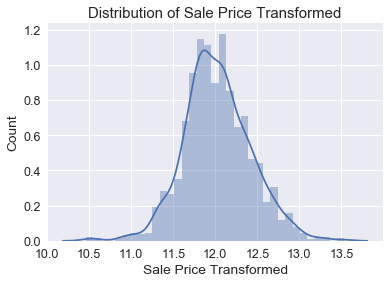

In [1674]:
houses = houses_full[ :1460]
ax = sns.distplot(houses['SalePrice'])
ax.set_xlabel('Sale Price Transformed')
ax.set_ylabel('Count')
ax.set_title('Distribution of Sale Price Transformed')
plt.show()

### 4. Filling Missing Categorical Variables

In [1675]:
for feature in houses_full[categorical]:
        houses_full[feature] = houses_full[feature].astype('category')
        if houses_full[feature].isnull().any():
            houses_full[feature] = houses_full[feature].cat.add_categories(['MISSING'])
            houses_full[feature] = houses_full[feature].fillna('MISSING')
            
houses_full.head()

1stFlrSF  2ndFlrSF  3SsnPorch    Alley  BedroomAbvGr BldgType BsmtCond  \
0  6.753438  6.751101        0.0  MISSING             3     1Fam       TA   
1  7.141245  0.000000        0.0  MISSING             3     1Fam       TA   
2  6.825460  6.765039        0.0  MISSING             3     1Fam       TA   
3  6.869014  6.629363        0.0  MISSING             3     1Fam       Gd   
4  7.044033  6.960348        0.0  MISSING             4     1Fam       TA   

  BsmtExposure  BsmtFinSF1  BsmtFinSF2  ...   SaleType ScreenPorch  Street  \
0           No    6.561031         0.0  ...         WD         0.0    Pave   
1           Gd    6.886532         0.0  ...         WD         0.0    Pave   
2           Mn    6.188264         0.0  ...         WD         0.0    Pave   
3           No    5.379897         0.0  ...         WD         0.0    Pave   
4           Av    6.486161         0.0  ...         WD         0.0    Pave   

   TotRmsAbvGrd TotalBsmtSF  Utilities WoodDeckSF YearBuilt YearRemodAdd  \
0      2.197225    6.753438     AllPub   0.000000      2003         2003   
1      1.945910    7.141245     AllPub   5.700444      1976         1976   
2      1.945910    6.825460     AllPub   0.000000      2001         2002   
3      2.079442    6.629363     AllPub   0.000000      1915         1970   
4      2.302585    7.044033     AllPub   5.262690      2000         2000   

  YrSold  
0   2008  
1   2007  
2   2008  
3   2006  
4   2008  

[5 rows x 81 columns]

### 5. Encoding Categorical Variables

In [1676]:
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o
    
qual_encoded = []
for q in categorical:  
    encode(houses_full, q)
    qual_encoded.append(q+'_E')
print(qual_encoded)

['Alley_E', 'BldgType_E', 'BsmtCond_E', 'BsmtExposure_E', 'BsmtFinType1_E', 'BsmtFinType2_E', 'BsmtQual_E', 'CentralAir_E', 'Condition1_E', 'Condition2_E', 'Electrical_E', 'ExterCond_E', 'ExterQual_E', 'Exterior1st_E', 'Exterior2nd_E', 'Fence_E', 'FireplaceQu_E', 'Foundation_E', 'Functional_E', 'GarageCond_E', 'GarageFinish_E', 'GarageQual_E', 'GarageType_E', 'Heating_E', 'HeatingQC_E', 'HouseStyle_E', 'KitchenQual_E', 'LandContour_E', 'LandSlope_E', 'LotConfig_E', 'LotShape_E', 'MSZoning_E', 'MasVnrType_E', 'MiscFeature_E', 'Neighborhood_E', 'PavedDrive_E', 'PoolQC_E', 'RoofMatl_E', 'RoofStyle_E', 'SaleCondition_E', 'SaleType_E', 'Street_E', 'Utilities_E']


#### 5a. Viewing Encoding Transformation

##### 5a-1. Train Set

In [1677]:
houses = houses_full[ :1460]
houses.describe()

1stFlrSF     2ndFlrSF    3SsnPorch  BedroomAbvGr   BsmtFinSF1  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean      7.008452     2.864586     0.085679      2.866438     4.229731   
std       0.317431     3.293311     0.666876      0.815778     2.992052   
min       5.814131     0.000000     0.000000      0.000000     0.000000   
25%       6.783325     0.000000     0.000000      2.000000     0.000000   
50%       6.992096     0.000000     0.000000      3.000000     5.951943   
75%       7.238676     6.591674     0.000000      3.000000     6.569832   
max       8.453827     7.633370     6.232448      8.000000     8.638525   

        BsmtFinSF2  BsmtFullBath  BsmtHalfBath    BsmtUnfSF  EnclosedPorch  \
count  1460.000000   1460.000000   1460.000000  1460.000000    1460.000000   
mean      0.655398      0.425342      0.039486     5.648378       0.698019   
std       1.845045      0.518911      0.162599     1.854020       1.727317   
min       0.000000      0.000000      0.000000     0.000000       0.000000   
25%       0.000000      0.000000      0.000000     5.411646       0.000000   
50%       0.000000      0.000000      0.000000     6.170651       0.000000   
75%       0.000000      1.000000      0.000000     6.695799       0.000000   
max       7.296413      3.000000      1.098612     7.756623       6.315358   

          ...       MiscFeature_E  Neighborhood_E  PavedDrive_E     PoolQC_E  \
count     ...         1460.000000     1460.000000   1460.000000  1460.000000   
mean      ...            2.966438       12.860274      2.856164     1.008904   
std       ...            0.205069        6.409677      0.496592     0.140703   
min       ...            1.000000        1.000000      1.000000     1.000000   
25%       ...            3.000000        7.000000      3.000000     1.000000   
50%       ...            3.000000       13.000000      3.000000     1.000000   
75%       ...            3.000000       17.000000      3.000000     1.000000   
max       ...            5.000000       25.000000      3.000000     4.000000   

        RoofMatl_E  RoofStyle_E  SaleCondition_E   SaleType_E     Street_E  \
count  1460.000000  1460.000000      1460.000000  1460.000000  1460.000000   
mean      3.040411     2.608219         4.831507     5.204795     1.995890   
std       0.395845     1.209938         0.887253     0.929955     0.063996   
min       1.000000     1.000000         1.000000     1.000000     1.000000   
25%       3.000000     2.000000         5.000000     5.000000     2.000000   
50%       3.000000     2.000000         5.000000     5.000000     2.000000   
75%       3.000000     2.000000         5.000000     5.000000     2.000000   
max       8.000000     6.000000         6.000000     9.000000     2.000000   

       Utilities_E  
count  1460.000000  
mean      1.999315  
std       0.026171  
min       1.000000  
25%       2.000000  
50%       2.000000  
75%       2.000000  
max       2.000000  

[8 rows x 81 columns]

##### 5a-2. Test Set

In [1678]:
test = houses_full[1460: ]
test.describe()

1stFlrSF     2ndFlrSF    3SsnPorch  BedroomAbvGr   BsmtFinSF1  \
count  1459.000000  1459.000000  1459.000000   1459.000000  1458.000000   
mean      6.999917     2.794559     0.046702      2.854010     4.223071   
std       0.327842     3.261396     0.493994      0.829788     2.971567   
min       6.011267     0.000000     0.000000      0.000000     0.000000   
25%       6.773652     0.000000     0.000000      2.000000     0.000000   
50%       6.984716     0.000000     0.000000      3.000000     5.862209   
75%       7.232372     6.517671     0.000000      3.000000     6.626049   
max       8.536211     7.529943     5.888878      6.000000     8.296796   

        BsmtFinSF2  BsmtFullBath  BsmtHalfBath    BsmtUnfSF  EnclosedPorch  \
count  1458.000000   1457.000000   1457.000000  1458.000000    1459.000000   
mean      0.707051      0.434454      0.044800     5.605885       0.816893   
std       1.912309      0.530648      0.172272     1.879851       1.814052   
min       0.000000      0.000000      0.000000     0.000000       0.000000   
25%       0.000000      0.000000      0.000000     5.394761       0.000000   
50%       0.000000      0.000000      0.000000     6.133398       0.000000   
75%       0.000000      1.000000      0.000000     6.683048       0.000000   
max       7.331060      3.000000      1.098612     7.669028       6.920672   

          ...       MiscFeature_E  Neighborhood_E  PavedDrive_E     PoolQC_E  \
count     ...         1459.000000     1459.000000   1459.000000  1459.000000   
mean      ...            2.967786       12.572995      2.805346     1.004798   
std       ...            0.195080        6.532969      0.574204     0.114055   
min       ...            1.000000        1.000000      1.000000     1.000000   
25%       ...            3.000000        7.000000      3.000000     1.000000   
50%       ...            3.000000       12.000000      3.000000     1.000000   
75%       ...            3.000000       17.000000      3.000000     1.000000   
max       ...            4.000000       25.000000      3.000000     4.000000   

        RoofMatl_E  RoofStyle_E  SaleCondition_E   SaleType_E     Street_E  \
count  1459.000000  1459.000000      1459.000000  1459.000000  1459.000000   
mean      3.019877     2.557916         4.833448     5.195339     1.995888   
std       0.222875     1.177596         0.878226     0.947645     0.064018   
min       3.000000     1.000000         1.000000     1.000000     1.000000   
25%       3.000000     2.000000         5.000000     5.000000     2.000000   
50%       3.000000     2.000000         5.000000     5.000000     2.000000   
75%       3.000000     2.000000         5.000000     5.000000     2.000000   
max       8.000000     6.000000         6.000000    10.000000     2.000000   

       Utilities_E  
count  1459.000000  
mean      2.001371  
std       0.037012  
min       2.000000  
25%       2.000000  
50%       2.000000  
75%       2.000000  
max       3.000000  

[8 rows x 81 columns]

##### 5a-3. Full Data

In [1679]:
houses_full.describe()

1stFlrSF     2ndFlrSF    3SsnPorch  BedroomAbvGr   BsmtFinSF1  \
count  2919.000000  2919.000000  2919.000000   2919.000000  2918.000000   
mean      7.004186     2.829584     0.066197      2.860226     4.226403   
std       0.322650     3.277023     0.587089      0.822693     2.981325   
min       5.814131     0.000000     0.000000      0.000000     0.000000   
25%       6.776507     0.000000     0.000000      2.000000     0.000000   
50%       6.987490     0.000000     0.000000      3.000000     5.912150   
75%       7.235979     6.558198     0.000000      3.000000     6.598509   
max       8.536211     7.633370     6.232448      8.000000     8.638525   

        BsmtFinSF2  BsmtFullBath  BsmtHalfBath    BsmtUnfSF  EnclosedPorch  \
count  2918.000000   2917.000000   2917.000000  2918.000000    2919.000000   
mean      0.681207      0.429894      0.042140     5.627146       0.757435   
std       1.878810      0.524736      0.167493     1.866773       1.771894   
min       0.000000      0.000000      0.000000     0.000000       0.000000   
25%       0.000000      0.000000      0.000000     5.398163       0.000000   
50%       0.000000      0.000000      0.000000     6.148468       0.000000   
75%       0.000000      1.000000      0.000000     6.692703       0.000000   
max       7.331060      3.000000      1.098612     7.756623       6.920672   

          ...       MiscFeature_E  Neighborhood_E  PavedDrive_E     PoolQC_E  \
count     ...         2919.000000     2919.000000   2919.000000  2919.000000   
mean      ...            2.967112       12.716684      2.830764     1.006852   
std       ...            0.200105        6.472081      0.537299     0.128073   
min       ...            1.000000        1.000000      1.000000     1.000000   
25%       ...            3.000000        7.000000      3.000000     1.000000   
50%       ...            3.000000       12.000000      3.000000     1.000000   
75%       ...            3.000000       17.000000      3.000000     1.000000   
max       ...            5.000000       25.000000      3.000000     4.000000   

        RoofMatl_E  RoofStyle_E  SaleCondition_E   SaleType_E     Street_E  \
count  2919.000000  2919.000000      2919.000000  2919.000000  2919.000000   
mean      3.030147     2.583076         4.832477     5.200069     1.995889   
std       0.321359     1.193942         0.882602     0.938689     0.063996   
min       1.000000     1.000000         1.000000     1.000000     1.000000   
25%       3.000000     2.000000         5.000000     5.000000     2.000000   
50%       3.000000     2.000000         5.000000     5.000000     2.000000   
75%       3.000000     2.000000         5.000000     5.000000     2.000000   
max       8.000000     6.000000         6.000000    10.000000     2.000000   

       Utilities_E  
count  2919.000000  
mean      2.000343  
std       0.032062  
min       1.000000  
25%       2.000000  
50%       2.000000  
75%       2.000000  
max       3.000000  

[8 rows x 81 columns]

### 6. Selecting Features

#### 6a. Boxplots of Categorical Variables

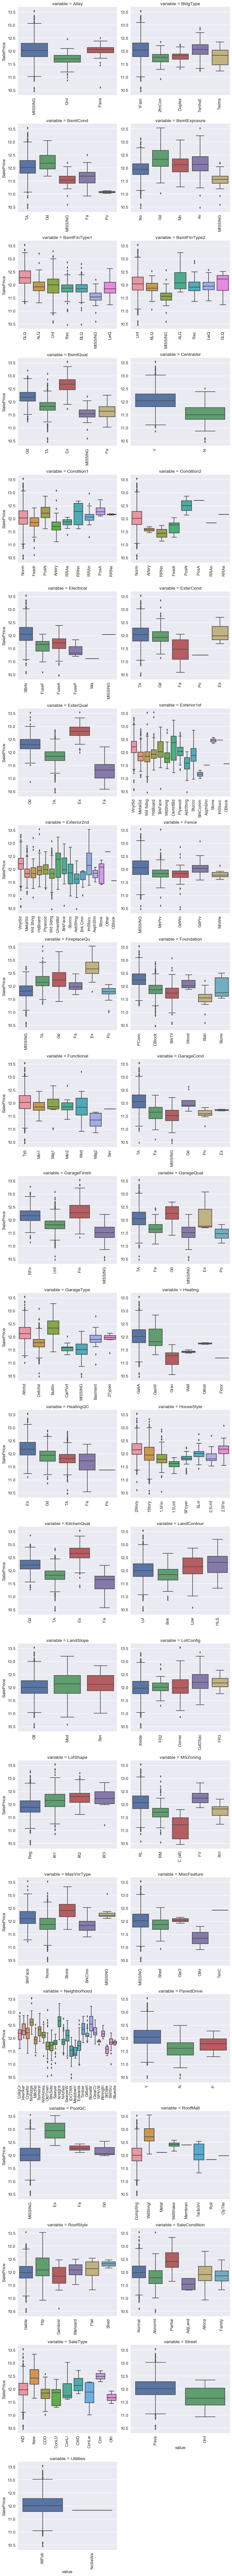

In [1680]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(houses, id_vars=['SalePrice'], value_vars=categorical)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

#### 6b. Analysis of Variance (ANOVA)

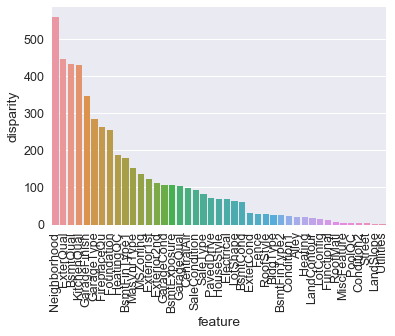

In [1681]:
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = categorical
    pvals = []
    for c in categorical:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(houses)
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

#### 6c. Spearman Correlation

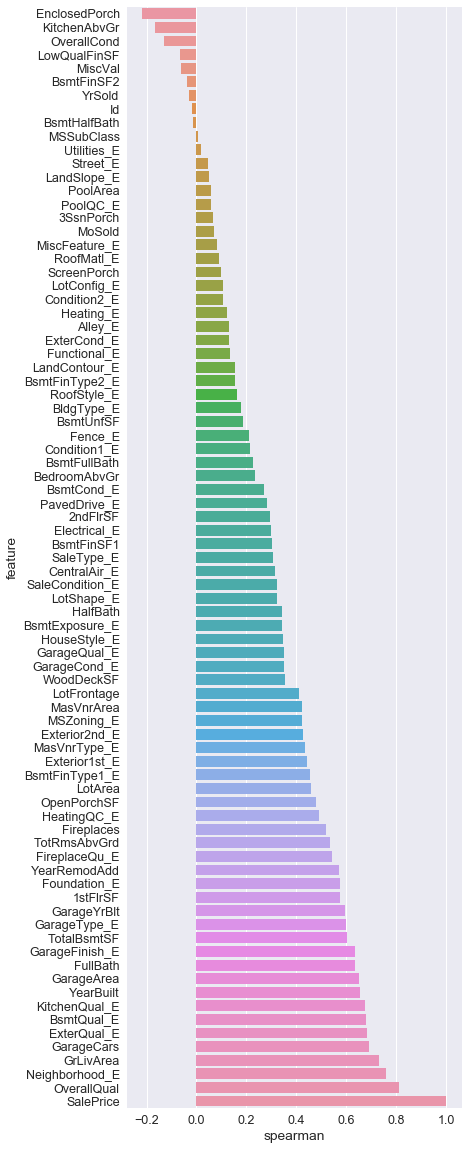

In [1682]:
numerical_columns = houses.select_dtypes(include = ['int64', 'float64']).columns

def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
spearman(houses, numerical_columns)

#### 6d. Sale Price Correlation Matrix (Categorical Variables)

Text(0.5,1,'Sale Price Correlation Matrix (Categorical Variables)')

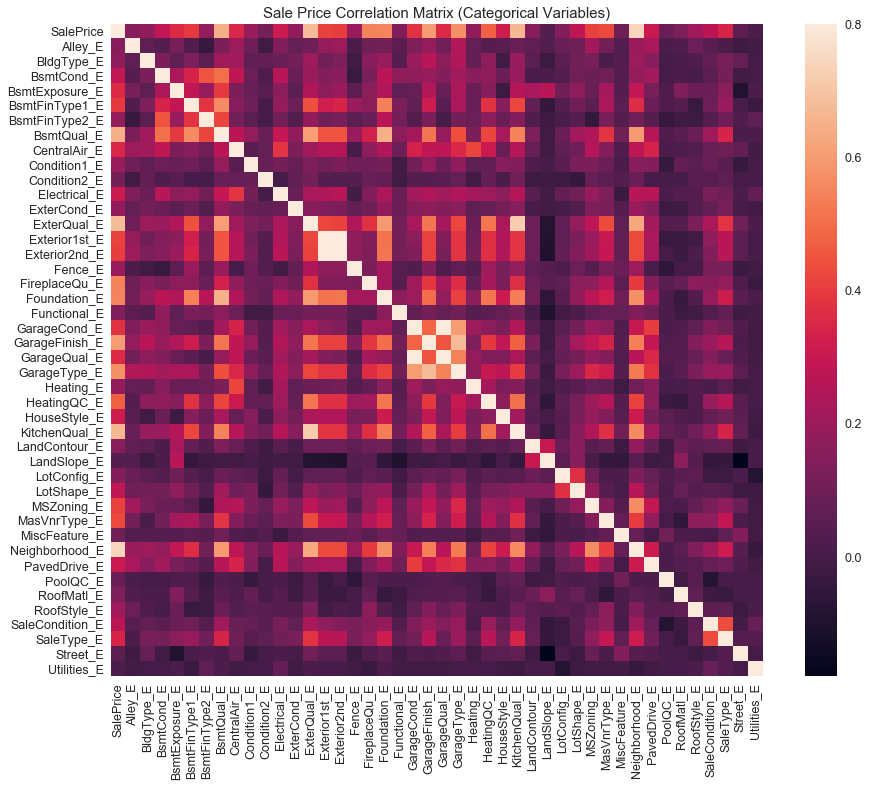

In [1683]:
corr_matrix = houses[['SalePrice'] + qual_encoded].corr()
f, ax = plt.subplots(figsize=(15,12))
corr_graph = sns.heatmap(corr_matrix, vmax=0.8, square=True)
corr_graph.set_title('Sale Price Correlation Matrix (Categorical Variables)')

#### 6e. Sale Price Top 10 Correlation Matrix (Categorical Variables)

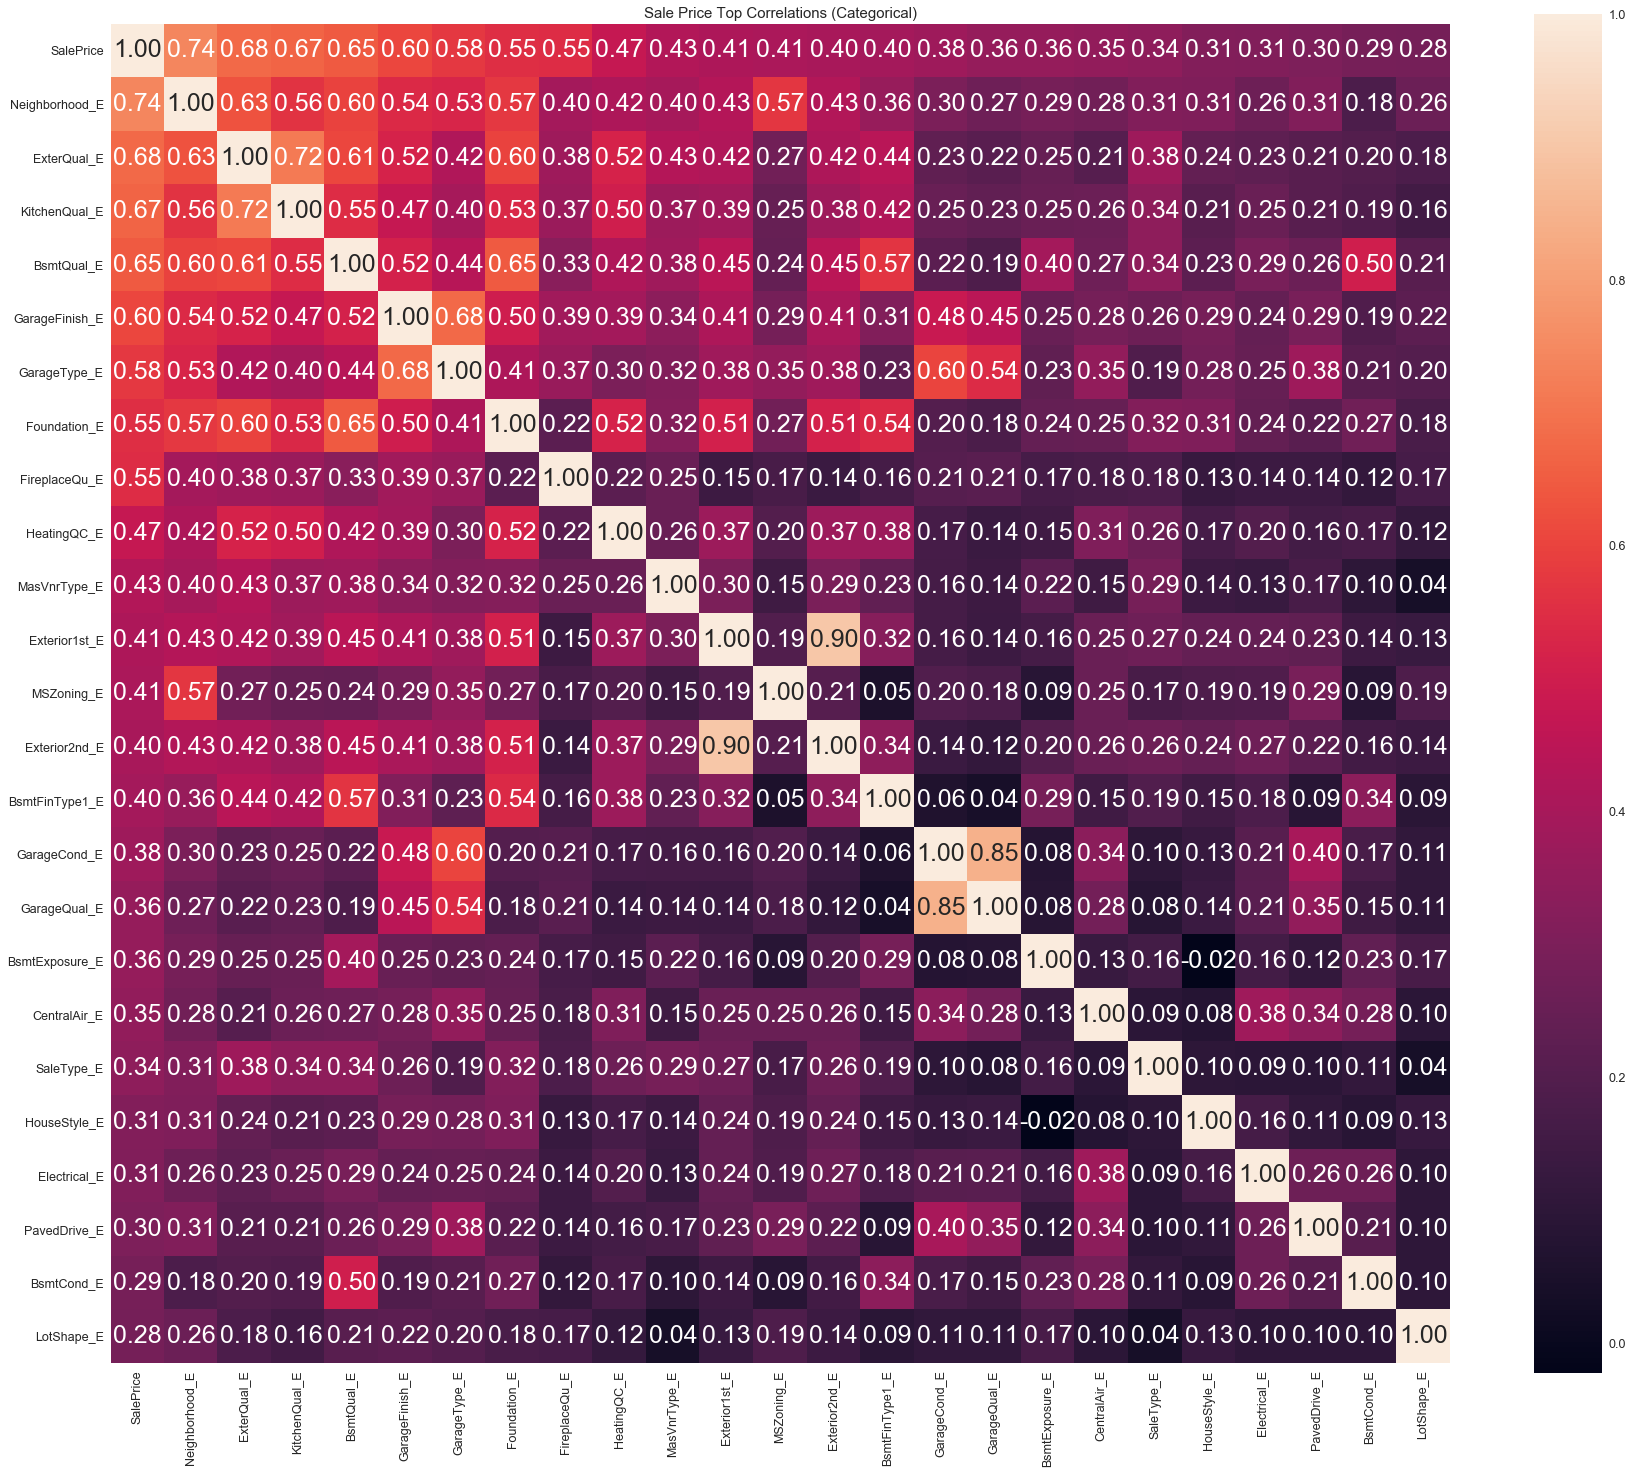

In [1684]:
k = 25
cols = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
f, ax = plt.subplots(figsize=(30,25))
cm = np.corrcoef(houses[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 25}, 
                 yticklabels=cols.values, xticklabels=cols.values)
hm.set_title('Sale Price Top Correlations (Categorical)')
plt.show()

#### 6f. Sale Price Correlation Matrix (Numeric Variables)

Text(0.5,1,'Sale Price Correlation Matrix (Numeric Variables)')

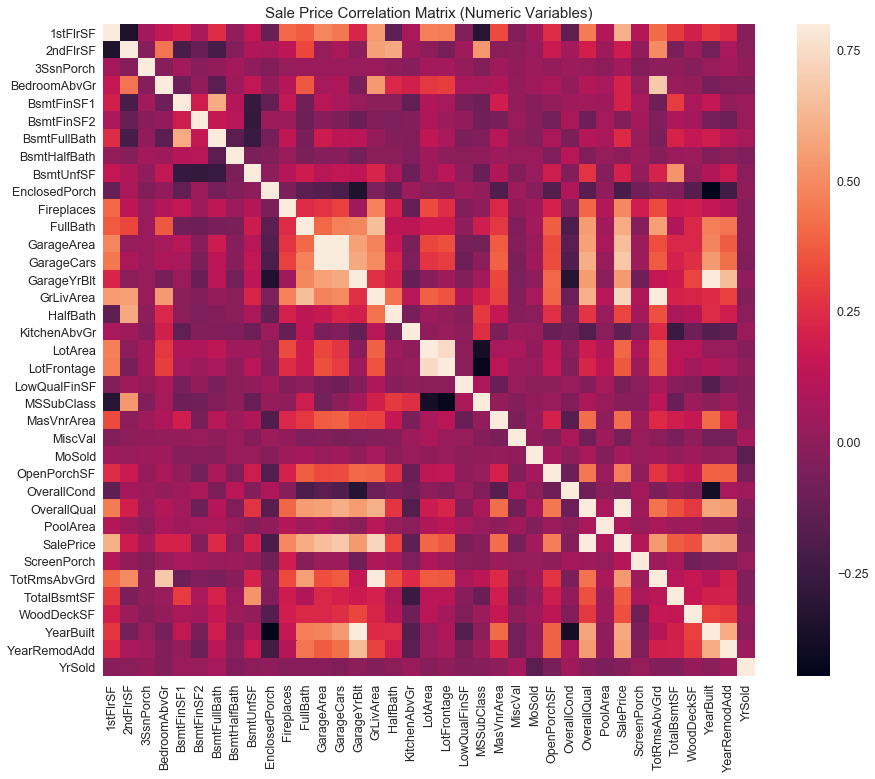

In [1685]:
corr_matrix_2 = houses[numerical].corr()
f, ax = plt.subplots(figsize=(15,12))
corr_graph = sns.heatmap(corr_matrix_2, vmax=0.8, square=True)
corr_graph.set_title('Sale Price Correlation Matrix (Numeric Variables)')

#### 6g. Sale Price Top 10 Correlation Matrix (Numeric Variables)

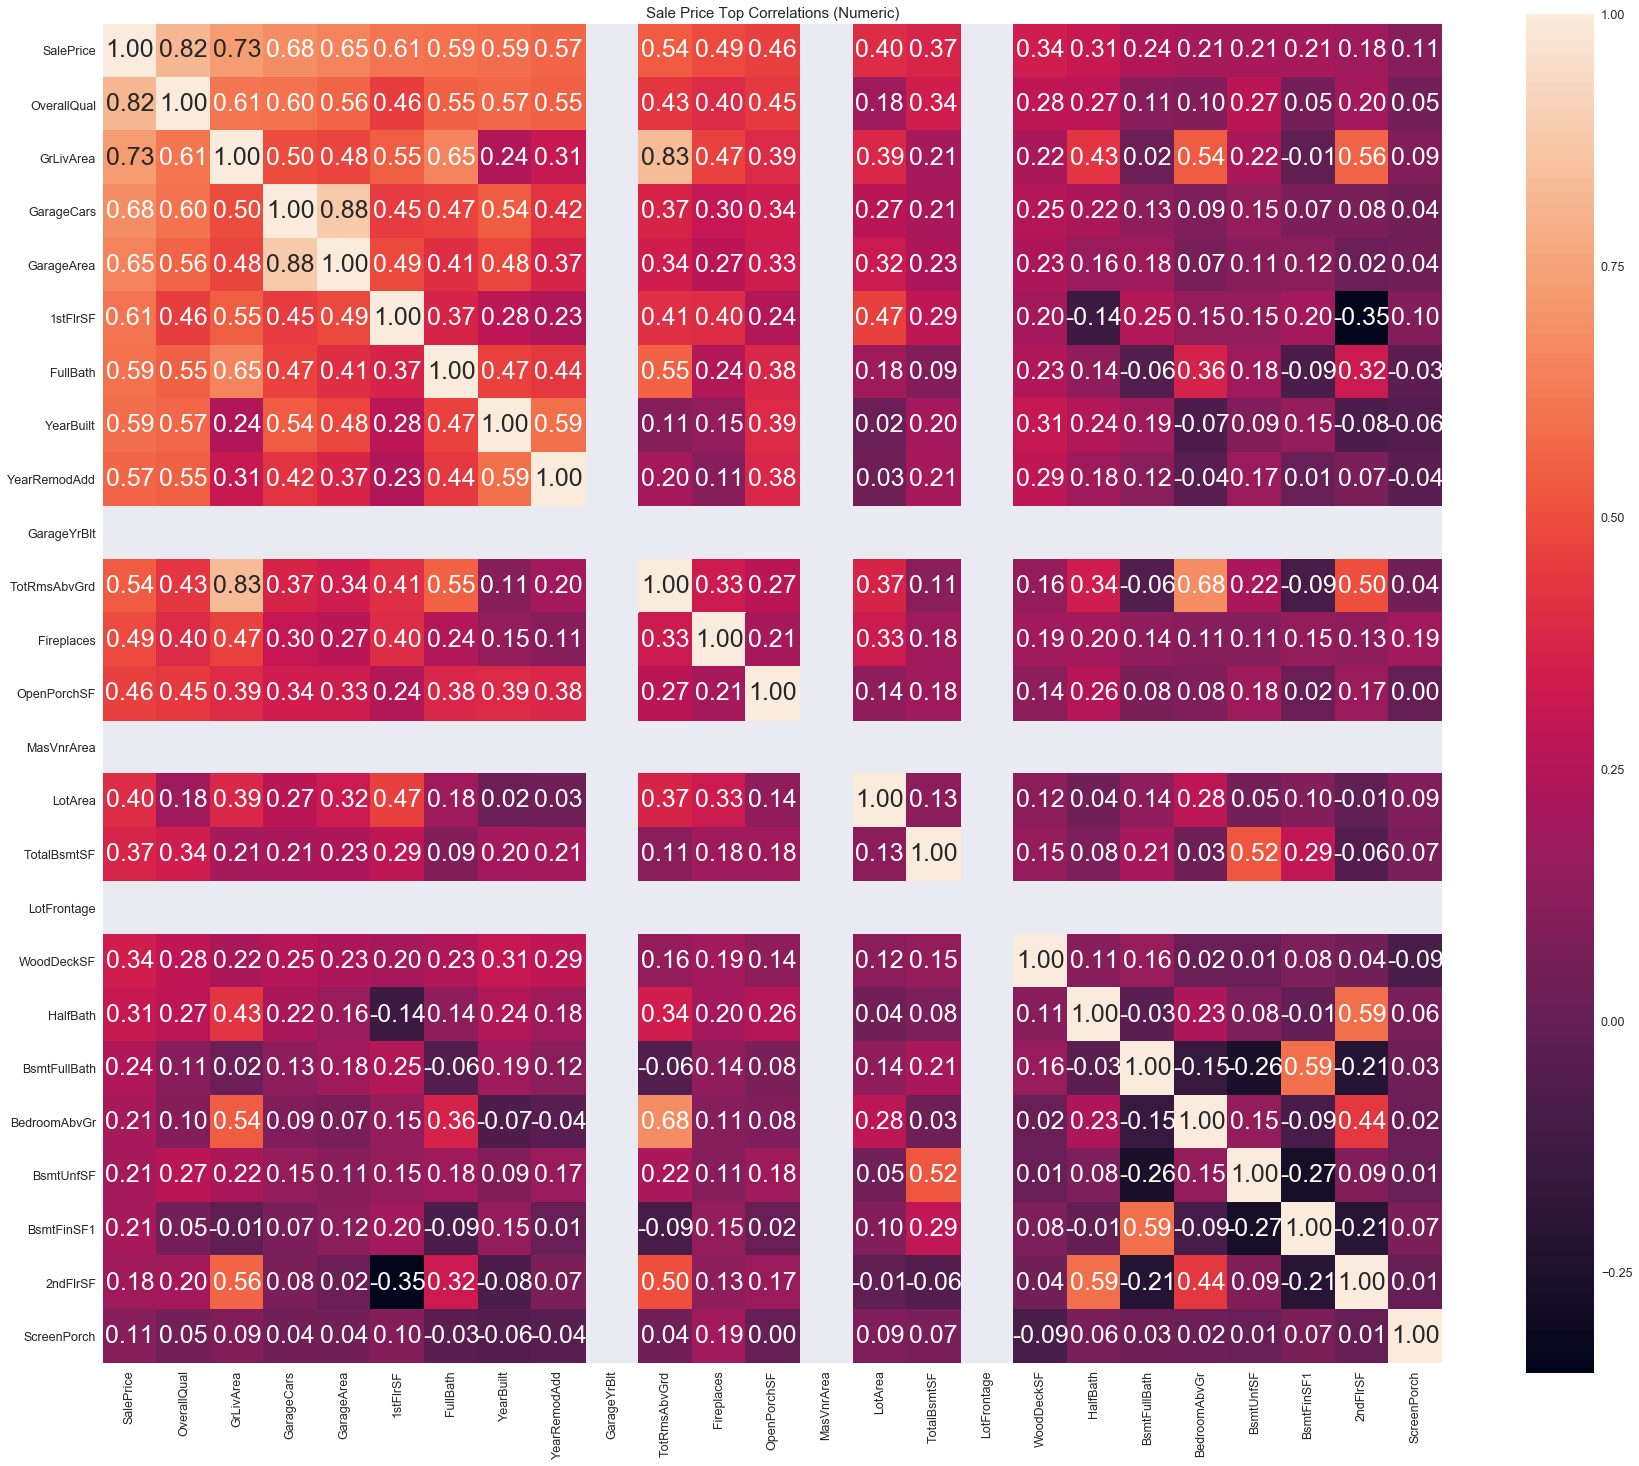

In [1686]:
k = 25
cols_2 = corr_matrix_2.nlargest(k, 'SalePrice')['SalePrice'].index
f, ax = plt.subplots(figsize=(30,25))
cm_2 = np.corrcoef(houses[cols_2].values.T)
sns.set(font_scale=1.25)
hm_2 = sns.heatmap(cm_2, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 25}, 
                 yticklabels=cols_2.values, xticklabels=cols_2.values)
hm_2.set_title('Sale Price Top Correlations (Numeric)')
plt.show()

#### 6h. Selecting Features Correlated with SalePrice

##### 6h-1 Full Subset

In [1687]:
cat_subset = houses_full[cols]
cat_subset = cat_subset.drop('SalePrice', axis=1)
num_subset = houses_full[cols_2]
full_subset = pd.concat([num_subset, cat_subset],axis=1)
full_subset.set_index('SalePrice')
full_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 49 columns):
SalePrice         1460 non-null float64
OverallQual       2919 non-null int64
GrLivArea         2919 non-null float64
GarageCars        2918 non-null float64
GarageArea        2918 non-null float64
1stFlrSF          2919 non-null float64
FullBath          2919 non-null int64
YearBuilt         2919 non-null int64
YearRemodAdd      2919 non-null int64
GarageYrBlt       2760 non-null float64
TotRmsAbvGrd      2919 non-null float64
Fireplaces        2919 non-null int64
OpenPorchSF       2919 non-null float64
MasVnrArea        2896 non-null float64
LotArea           2919 non-null float64
TotalBsmtSF       2918 non-null float64
LotFrontage       2433 non-null float64
WoodDeckSF        2919 non-null float64
HalfBath          2919 non-null int64
BsmtFullBath      2917 non-null float64
BedroomAbvGr      2919 non-null int64
BsmtUnfSF         2918 non-null float64
BsmtFinSF1        2918 non-

##### 6h-1. Train Subset

In [1688]:
train_subset = full_subset[ :1460]
train_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 49 columns):
SalePrice         1460 non-null float64
OverallQual       1460 non-null int64
GrLivArea         1460 non-null float64
GarageCars        1460 non-null float64
GarageArea        1460 non-null float64
1stFlrSF          1460 non-null float64
FullBath          1460 non-null int64
YearBuilt         1460 non-null int64
YearRemodAdd      1460 non-null int64
GarageYrBlt       1379 non-null float64
TotRmsAbvGrd      1460 non-null float64
Fireplaces        1460 non-null int64
OpenPorchSF       1460 non-null float64
MasVnrArea        1452 non-null float64
LotArea           1460 non-null float64
TotalBsmtSF       1460 non-null float64
LotFrontage       1201 non-null float64
WoodDeckSF        1460 non-null float64
HalfBath          1460 non-null int64
BsmtFullBath      1460 non-null float64
BedroomAbvGr      1460 non-null int64
BsmtUnfSF         1460 non-null float64
BsmtFinSF1        1460 non-

##### 6h-3. Test Subset

In [1689]:
test_subset = full_subset[1460: ]
test_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 1460 to 2918
Data columns (total 49 columns):
SalePrice         0 non-null float64
OverallQual       1459 non-null int64
GrLivArea         1459 non-null float64
GarageCars        1458 non-null float64
GarageArea        1458 non-null float64
1stFlrSF          1459 non-null float64
FullBath          1459 non-null int64
YearBuilt         1459 non-null int64
YearRemodAdd      1459 non-null int64
GarageYrBlt       1381 non-null float64
TotRmsAbvGrd      1459 non-null float64
Fireplaces        1459 non-null int64
OpenPorchSF       1459 non-null float64
MasVnrArea        1444 non-null float64
LotArea           1459 non-null float64
TotalBsmtSF       1458 non-null float64
LotFrontage       1232 non-null float64
WoodDeckSF        1459 non-null float64
HalfBath          1459 non-null int64
BsmtFullBath      1457 non-null float64
BedroomAbvGr      1459 non-null int64
BsmtUnfSF         1458 non-null float64
BsmtFinSF1        1458 non-

##### 6h-1. Viewing Features for Predictive Model

In [1690]:
train_subset.head(20)

SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  1stFlrSF  \
0   12.247699            7   7.444833         2.0       548.0  6.753438   
1   12.109016            6   7.141245         2.0       460.0  7.141245   
2   12.317171            7   7.488294         2.0       608.0  6.825460   
3   11.849405            7   7.448916         3.0       642.0  6.869014   
4   12.429220            8   7.695758         3.0       836.0  7.044033   
5   11.870607            5   7.217443         2.0       480.0  6.680855   
6   12.634606            8   7.435438         2.0       636.0  7.435438   
7   12.206078            7   7.645398         2.0       484.0  7.010312   
8   11.774528            7   7.481556         2.0       468.0  6.930495   
9   11.678448            5   6.982863         1.0       205.0  6.982863   
10  11.771444            5   6.947937         1.0       384.0  6.947937   
11  12.751303            9   7.751475         3.0       736.0  7.075809   
12  11.877576            5   6.816736         1.0       352.0  6.816736   
13  12.540761            7   7.309881         3.0       840.0  7.309881   
14  11.964007            6   7.134094         1.0       352.0  7.134094   
15  11.790565            7   6.751101         2.0       576.0  6.751101   
16  11.911708            6   6.912743         2.0       480.0  6.912743   
17  11.407576            4   7.167809         2.0       516.0  7.167809   
18  11.976666            5   7.016610         2.0       576.0  7.016610   
19  11.842236            5   7.200425         1.0       294.0  7.200425   

    FullBath  YearBuilt  YearRemodAdd  GarageYrBlt     ...      GarageCond_E  \
0          2       2003          2003       2003.0     ...               6.0   
1          2       1976          1976       1976.0     ...               6.0   
2          2       2001          2002       2001.0     ...               6.0   
3          1       1915          1970       1998.0     ...               6.0   
4          2       2000          2000       2000.0     ...               6.0   
5          1       1993          1995       1993.0     ...               6.0   
6          2       2004          2005       2004.0     ...               6.0   
7          2       1973          1973       1973.0     ...               6.0   
8          2       1931          1950       1931.0     ...               6.0   
9          1       1939          1950       1939.0     ...               6.0   
10         1       1965          1965       1965.0     ...               6.0   
11         3       2005          2006       2005.0     ...               6.0   
12         1       1962          1962       1962.0     ...               6.0   
13         2       2006          2007       2006.0     ...               6.0   
14         1       1960          1960       1960.0     ...               6.0   
15         1       1929          2001       1991.0     ...               6.0   
16         1       1970          1970       1970.0     ...               6.0   
17         2       1967          1967       1967.0     ...               6.0   
18         1       2004          2004       2004.0     ...               6.0   
19         1       1958          1965       1958.0     ...               6.0   

    GarageQual_E  BsmtExposure_E  CentralAir_E  SaleType_E  HouseStyle_E  \
0            4.0             2.0           2.0         5.0           7.0   
1            4.0             5.0           2.0         5.0           5.0   
2            4.0             3.0           2.0         5.0           7.0   
3            4.0             2.0           2.0         5.0           7.0   
4            4.0             4.0           2.0         5.0           7.0   
5            4.0             2.0           2.0         5.0           3.0   
6            4.0             4.0           2.0         5.0           5.0   
7            4.0             3.0           2.0         5.0           7.0   
8            3.0             2.0           2.0         5.0     

##### 6h-2. Inspecting New DataFrame

In [1691]:
train_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 49 columns):
SalePrice         1460 non-null float64
OverallQual       1460 non-null int64
GrLivArea         1460 non-null float64
GarageCars        1460 non-null float64
GarageArea        1460 non-null float64
1stFlrSF          1460 non-null float64
FullBath          1460 non-null int64
YearBuilt         1460 non-null int64
YearRemodAdd      1460 non-null int64
GarageYrBlt       1379 non-null float64
TotRmsAbvGrd      1460 non-null float64
Fireplaces        1460 non-null int64
OpenPorchSF       1460 non-null float64
MasVnrArea        1452 non-null float64
LotArea           1460 non-null float64
TotalBsmtSF       1460 non-null float64
LotFrontage       1201 non-null float64
WoodDeckSF        1460 non-null float64
HalfBath          1460 non-null int64
BsmtFullBath      1460 non-null float64
BedroomAbvGr      1460 non-null int64
BsmtUnfSF         1460 non-null float64
BsmtFinSF1        1460 non-

### 7. Feature Engineering

#### 7a. has_feature Function

In [1692]:
def has_feature(feature): 
    if feature > 0:
        return 1
    else: 
        return 0

#### 7b. Full Data Set Engineering

In [1693]:
full_subset['HasBasement'] = full_subset['TotalBsmtSF'].apply(has_feature)
full_subset['HasGarage'] = full_subset['GarageArea'].apply(has_feature)
full_subset['Has2ndFlr'] = full_subset['2ndFlrSF'].apply(has_feature)
full_subset['HasOpenPorch'] = full_subset['OpenPorchSF'].apply(has_feature)
full_subset['HasScreenPorch'] = full_subset['ScreenPorch'].apply(has_feature)
full_subset['HasFirePlace'] = full_subset['Fireplaces'].apply(has_feature)
full_subset['HasMsVnr'] = full_subset['MasVnrArea'].apply(has_feature)
full_subset['HasWoodDeck'] = full_subset['WoodDeckSF'].apply(has_feature)
full_subset['HasPool'] = houses_full['PoolArea'].apply(has_feature)
full_subset['HasBasementBathroom'] = full_subset['BsmtFullBath'].apply(has_feature)
full_subset['ExtraBathrooms'] = full_subset['FullBath'].apply(lambda x: 1 if x > 1 else 0)
full_subset['PoolArea'] = houses_full['PoolArea']
full_subset['New'] = full_subset['YearBuilt'].apply(lambda x: 1 if x > 2000 else 0)
full_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 62 columns):
SalePrice              1460 non-null float64
OverallQual            2919 non-null int64
GrLivArea              2919 non-null float64
GarageCars             2918 non-null float64
GarageArea             2918 non-null float64
1stFlrSF               2919 non-null float64
FullBath               2919 non-null int64
YearBuilt              2919 non-null int64
YearRemodAdd           2919 non-null int64
GarageYrBlt            2760 non-null float64
TotRmsAbvGrd           2919 non-null float64
Fireplaces             2919 non-null int64
OpenPorchSF            2919 non-null float64
MasVnrArea             2896 non-null float64
LotArea                2919 non-null float64
TotalBsmtSF            2918 non-null float64
LotFrontage            2433 non-null float64
WoodDeckSF             2919 non-null float64
HalfBath               2919 non-null int64
BsmtFullBath           2917 non-null float64
Bedro

#### 7c. Train_subset Engineering

In [1694]:
train_subset = full_subset[ :1460]
train_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
SalePrice              1460 non-null float64
OverallQual            1460 non-null int64
GrLivArea              1460 non-null float64
GarageCars             1460 non-null float64
GarageArea             1460 non-null float64
1stFlrSF               1460 non-null float64
FullBath               1460 non-null int64
YearBuilt              1460 non-null int64
YearRemodAdd           1460 non-null int64
GarageYrBlt            1379 non-null float64
TotRmsAbvGrd           1460 non-null float64
Fireplaces             1460 non-null int64
OpenPorchSF            1460 non-null float64
MasVnrArea             1452 non-null float64
LotArea                1460 non-null float64
TotalBsmtSF            1460 non-null float64
LotFrontage            1201 non-null float64
WoodDeckSF             1460 non-null float64
HalfBath               1460 non-null int64
BsmtFullBath           1460 non-null float64
Bedro

#### 7d. Test Set

In [1695]:
test_subset = full_subset[1460: ]
test_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 1460 to 2918
Data columns (total 62 columns):
SalePrice              0 non-null float64
OverallQual            1459 non-null int64
GrLivArea              1459 non-null float64
GarageCars             1458 non-null float64
GarageArea             1458 non-null float64
1stFlrSF               1459 non-null float64
FullBath               1459 non-null int64
YearBuilt              1459 non-null int64
YearRemodAdd           1459 non-null int64
GarageYrBlt            1381 non-null float64
TotRmsAbvGrd           1459 non-null float64
Fireplaces             1459 non-null int64
OpenPorchSF            1459 non-null float64
MasVnrArea             1444 non-null float64
LotArea                1459 non-null float64
TotalBsmtSF            1458 non-null float64
LotFrontage            1232 non-null float64
WoodDeckSF             1459 non-null float64
HalfBath               1459 non-null int64
BsmtFullBath           1457 non-null float64
Bedro

### 8. Visualizing Data

#### 8a. Scatter Plots of Selected Features

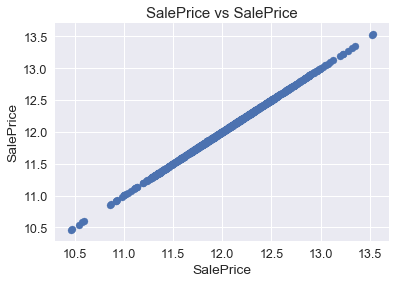

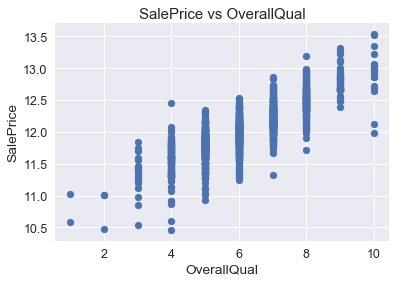

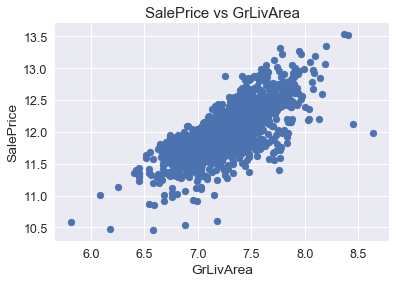

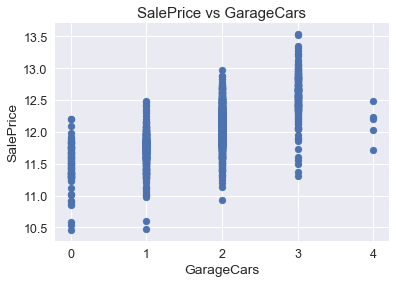

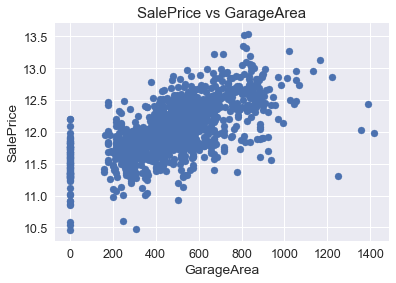

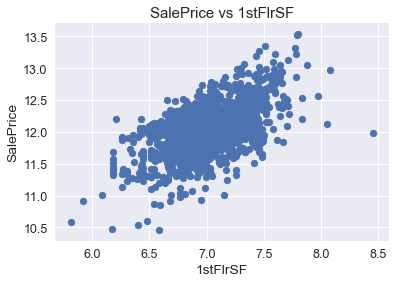

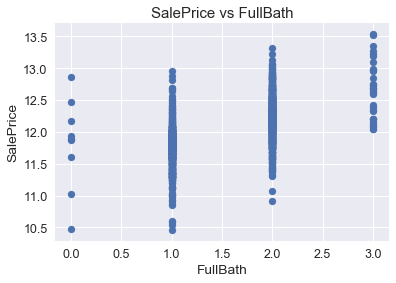

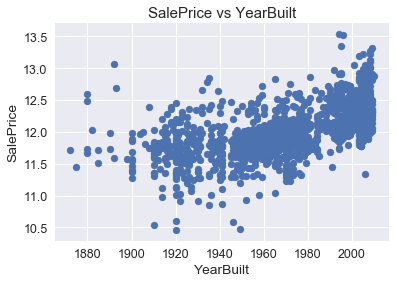

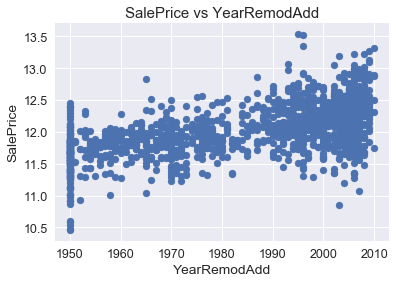

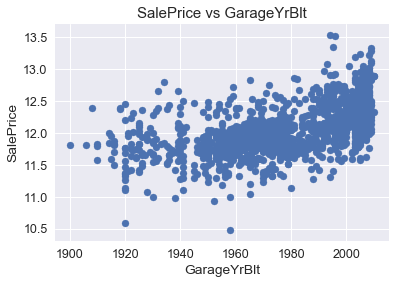

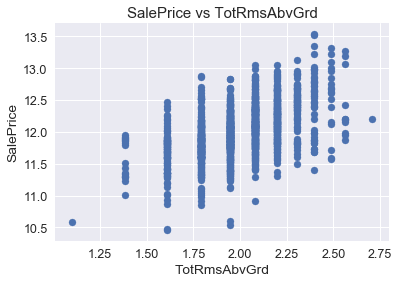

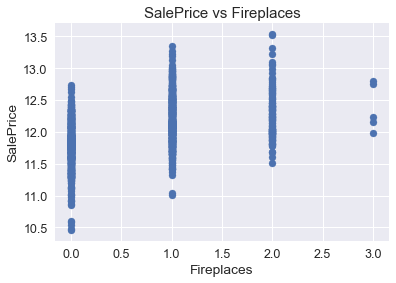

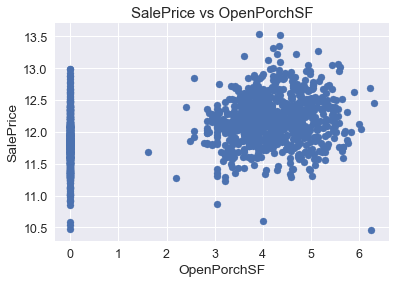

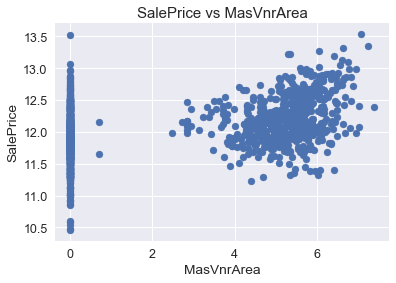

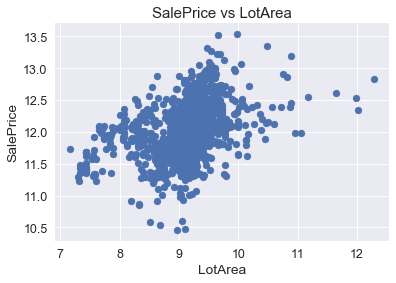

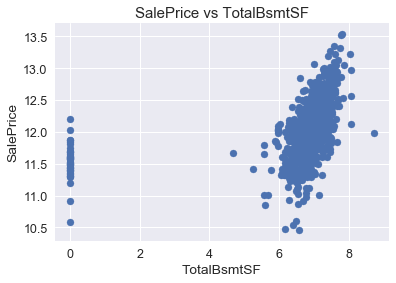

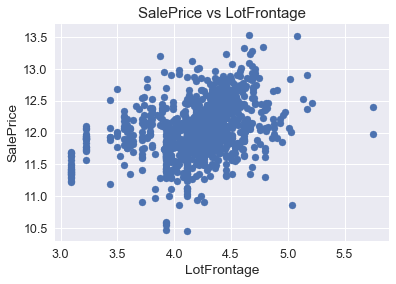

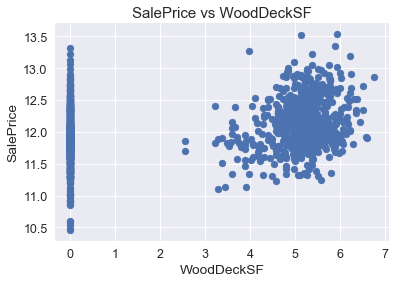

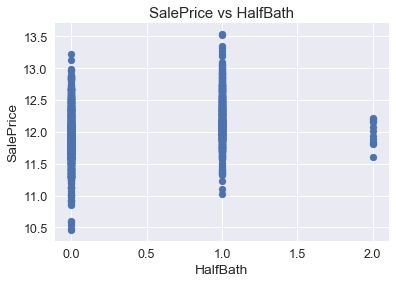

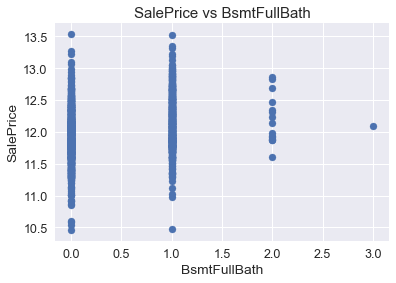

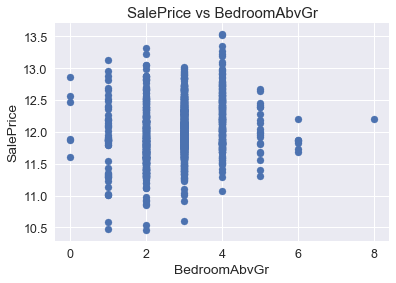

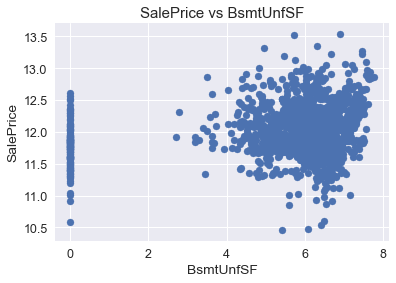

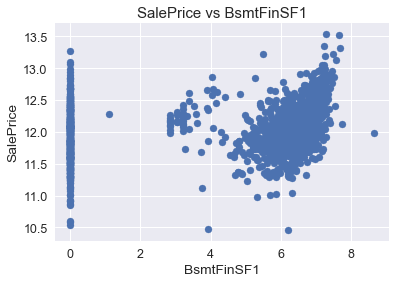

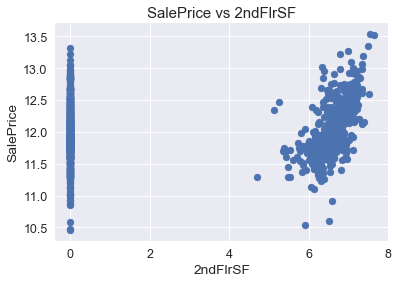

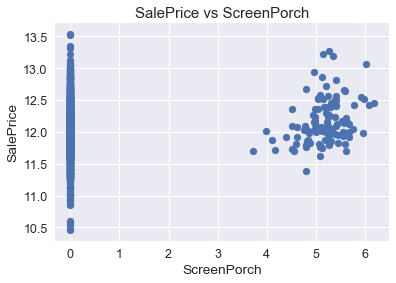

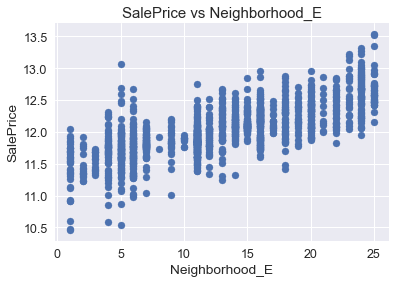

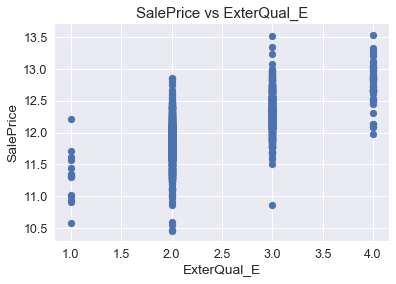

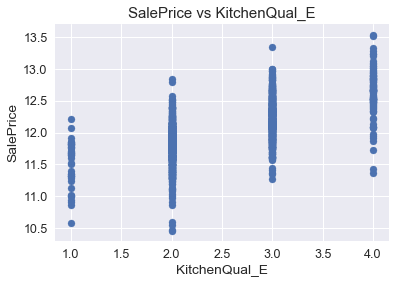

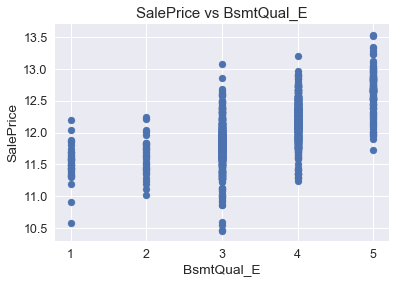

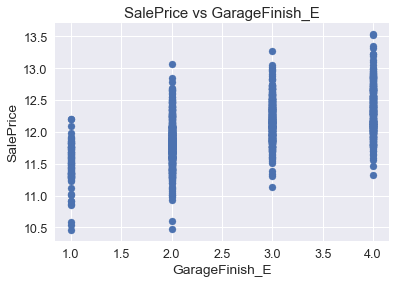

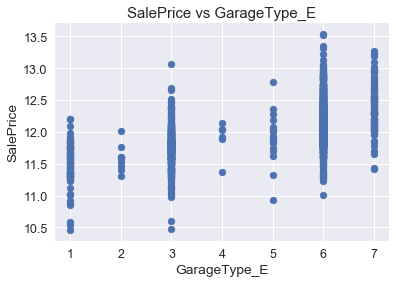

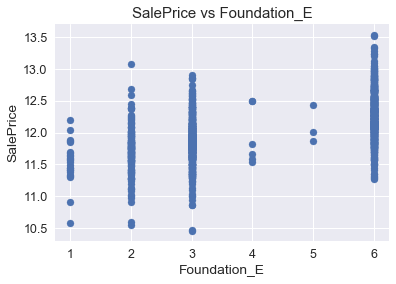

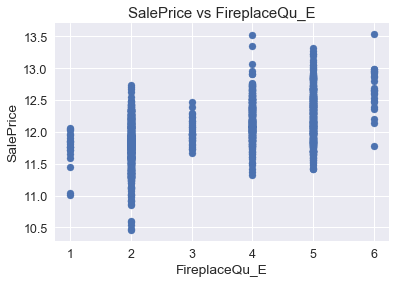

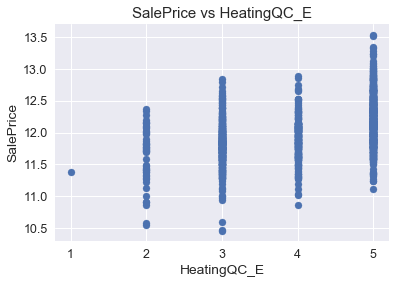

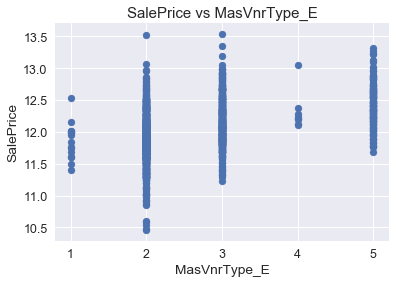

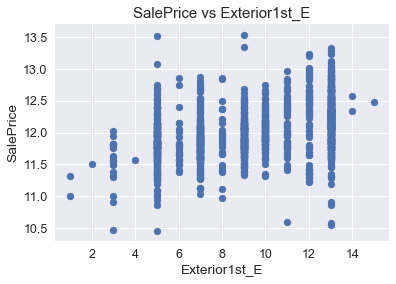

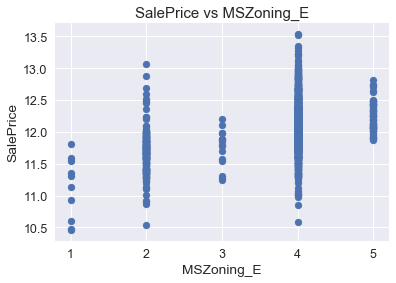

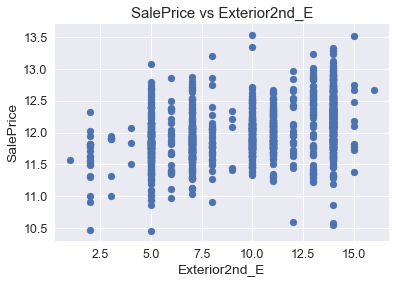

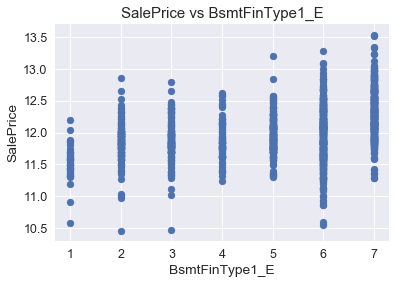

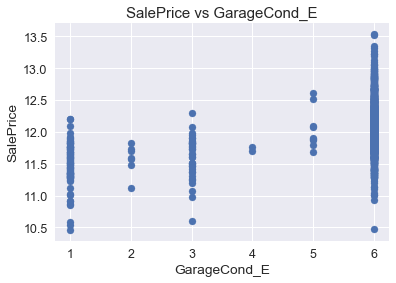

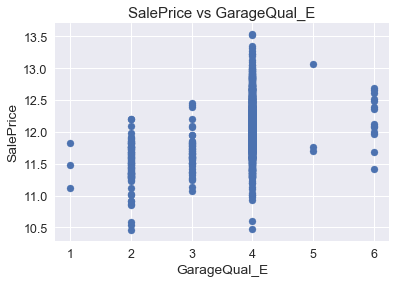

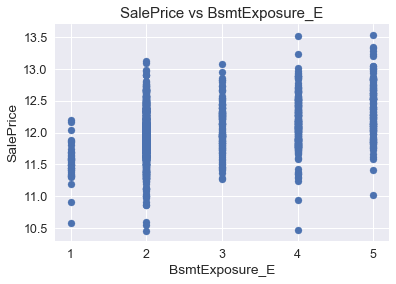

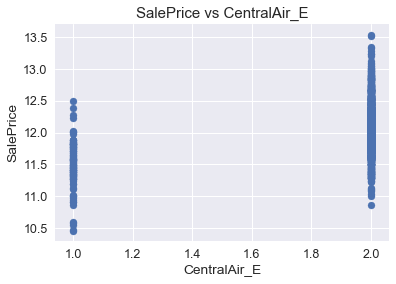

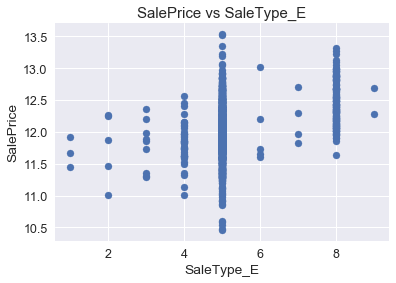

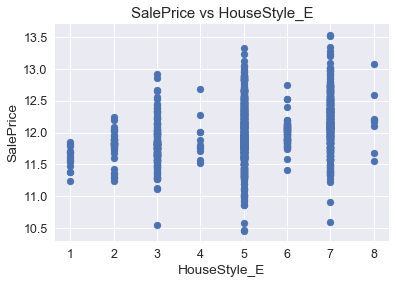

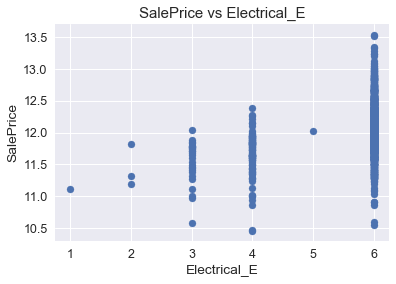

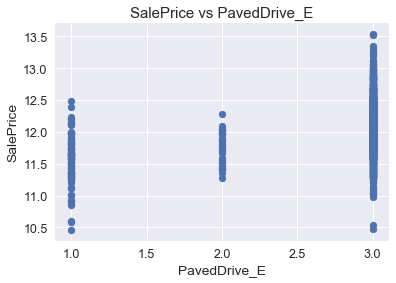

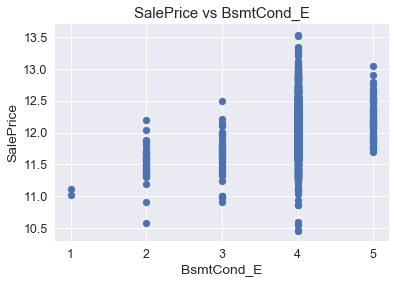

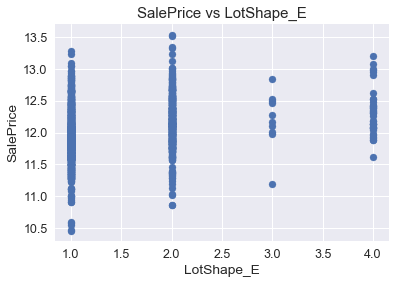

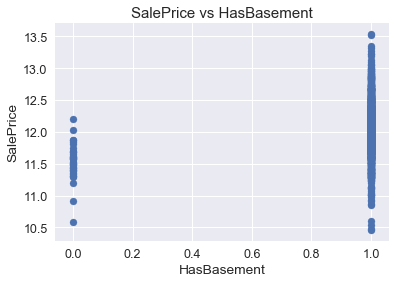

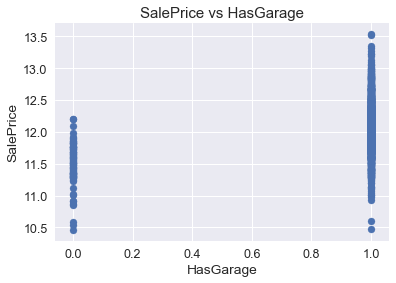

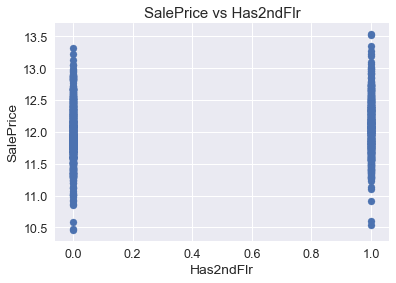

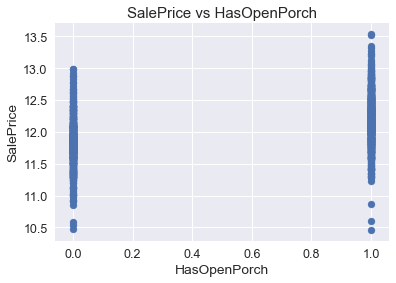

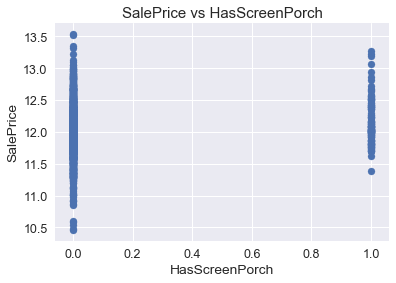

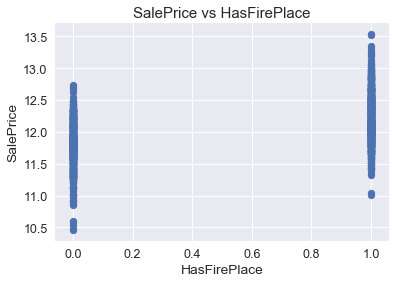

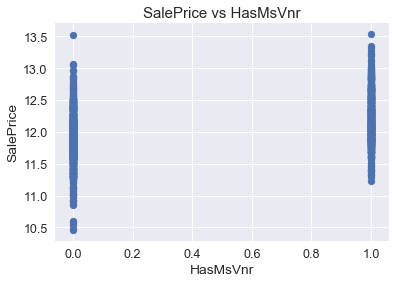

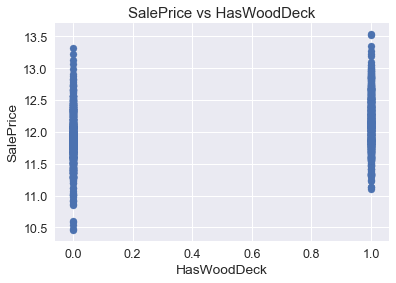

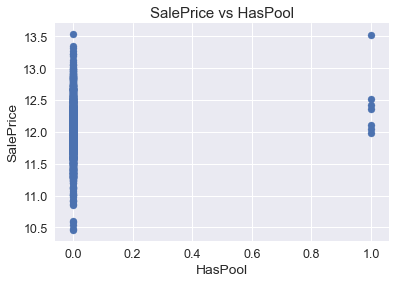

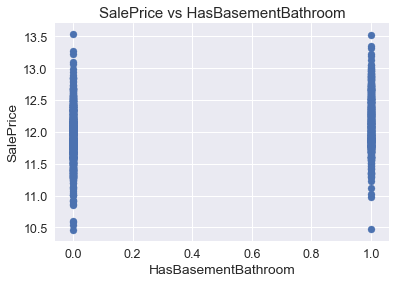

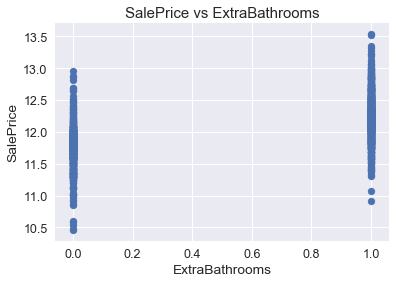

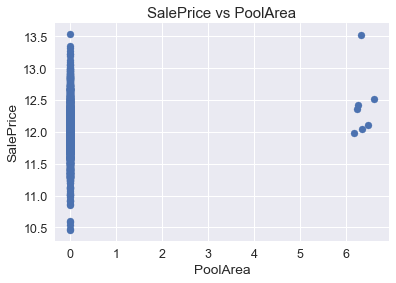

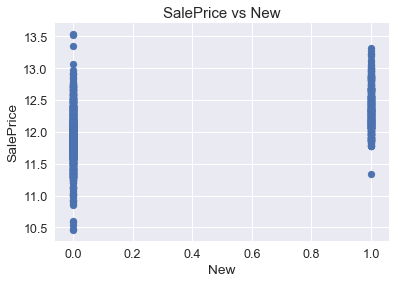

In [1696]:
for feature in train_subset:
    plt.scatter(train_subset[feature], train_subset['SalePrice'])
    plt.title('SalePrice vs ' + feature)
    plt.ylabel('SalePrice')
    plt.xlabel(feature)
    plt.show()

#### 8b. Removing Outliers from GrLivArea

In [1697]:
train_subset = train_subset.drop(train_subset[train_subset['GrLivArea'] > 8.3].index &
                                train_subset[train_subset['SalePrice'] < 12.25].index)
train_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 62 columns):
SalePrice              1458 non-null float64
OverallQual            1458 non-null int64
GrLivArea              1458 non-null float64
GarageCars             1458 non-null float64
GarageArea             1458 non-null float64
1stFlrSF               1458 non-null float64
FullBath               1458 non-null int64
YearBuilt              1458 non-null int64
YearRemodAdd           1458 non-null int64
GarageYrBlt            1377 non-null float64
TotRmsAbvGrd           1458 non-null float64
Fireplaces             1458 non-null int64
OpenPorchSF            1458 non-null float64
MasVnrArea             1450 non-null float64
LotArea                1458 non-null float64
TotalBsmtSF            1458 non-null float64
LotFrontage            1199 non-null float64
WoodDeckSF             1458 non-null float64
HalfBath               1458 non-null int64
BsmtFullBath           1458 non-null float64
Bedro

##### 8b-1. SalePrice vs GrLivArea Scatterplot with Outliers Removed

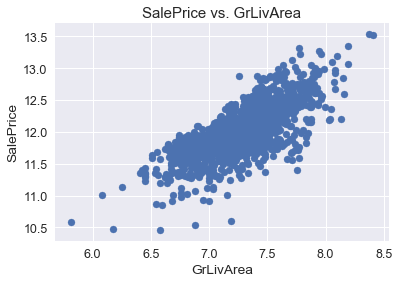

In [1698]:
plt.scatter(train_subset['GrLivArea'], train_subset['SalePrice'])
plt.title('SalePrice vs. GrLivArea')
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

### 9. Getting Predictions     

#### 9a. Getting Dummy Variables

In [1699]:
houses_full = pd.get_dummies(houses_full)
train_subset = pd.get_dummies(train_subset)

#### 9b. Filling Missing Values

In [1700]:
houses_full = houses_full.fillna(houses_full.mean())
train_subset = train_subset.fillna(houses_full.mean())
test_subset = test_subset.fillna(houses_full.mean())

#### 9c. Partitioning Data

In [1701]:
X_train, X_test, y_train, y_test = train_test_split(train_subset.drop('SalePrice', axis=1), train_subset['SalePrice'], 
                                                    test_size = 0.3, random_state = 36)

#### 9d. Writing Function to Record RMSE

In [1702]:
# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

#### 9e. Linear Regression Model

RMSE on Training set : 0.125193658492
RMSE on Test set : 0.133499876433


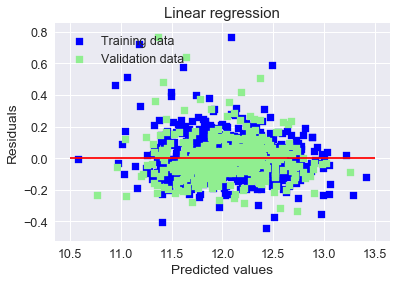

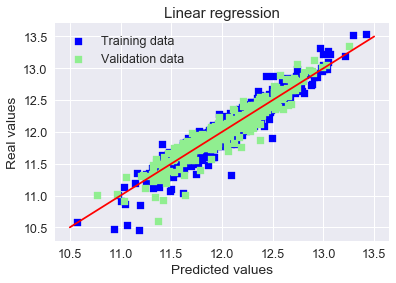

In [1703]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

#### 9f. Ridge Model

Best alpha : 0.1
Try again for more precision with alphas centered around 0.1
Best alpha : 0.14
Ridge RMSE on Training set : 0.124741372297
Ridge RMSE on Test set : 0.132722008728


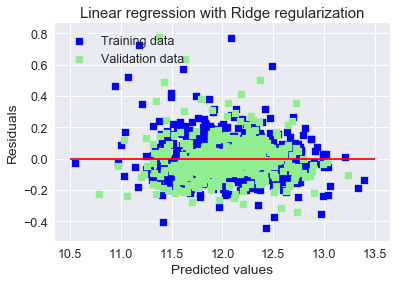

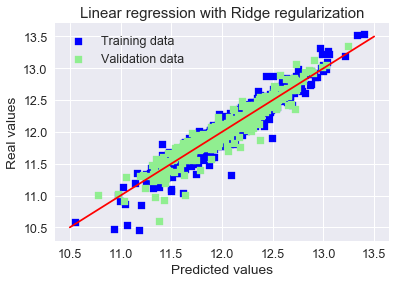

Ridge picked 61 features and eliminated the other 0 features


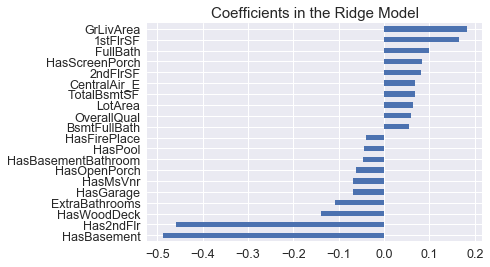

In [1704]:
# 2* Ridge
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_rdg, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

#### 9g. Lasso Model

Best alpha : 0.0001
Try again for more precision with alphas centered around 0.0001
Best alpha : 6e-05
Lasso RMSE on Training set : 0.124690397288
Lasso RMSE on Test set : 0.132682934718


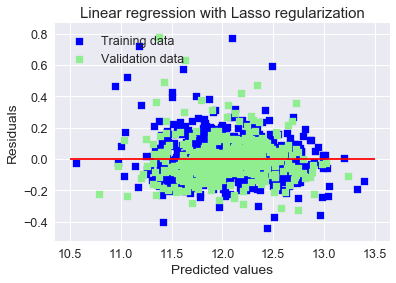

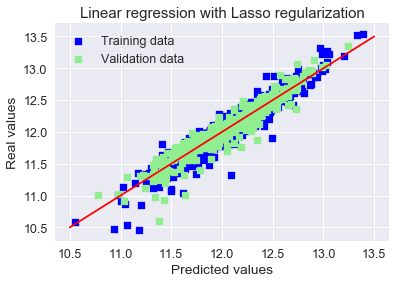

Lasso picked 59 features and eliminated the other 2 features


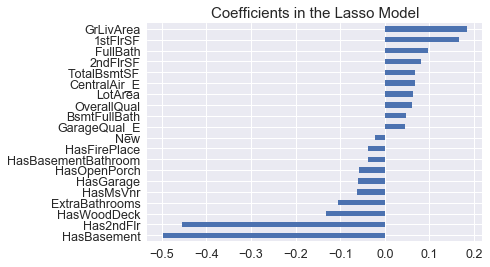

In [1705]:
# 3* Lasso
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Lasso RMSE on Training set :", rmse_cv_train(lasso).mean())
print("Lasso RMSE on Test set :", rmse_cv_test(lasso).mean())
y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test)

# Plot residuals
plt.scatter(y_train_las, y_train_las - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test_las - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_las, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

#### 9h. ElasticNet Model

Best l1_ratio : 0.5
Best alpha : 0.0001
Try again for more precision with l1_ratio centered around 0.5
Best l1_ratio : 0.575
Best alpha : 0.0001
Now try again for more precision on alpha, with l1_ratio fixed at 0.575 and alpha centered around 0.0001
Best l1_ratio : 0.575
Best alpha : 0.0001
ElasticNet RMSE on Training set : 0.124746964129
ElasticNet RMSE on Test set : 0.132763502296


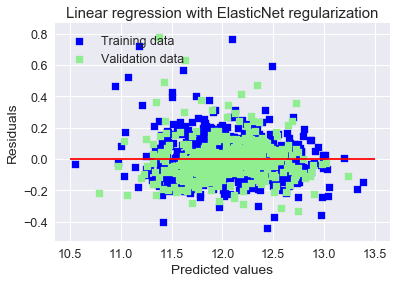

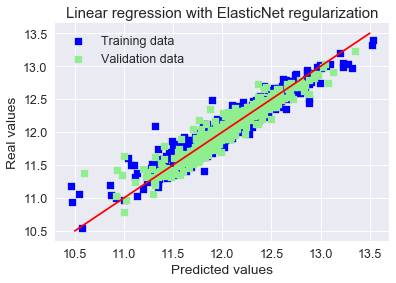

ElasticNet picked 59 features and eliminated the other 2 features


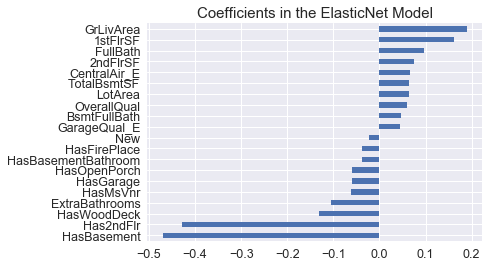

In [1706]:
elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Try again for more precision with l1_ratio centered around " + str(ratio))
elasticNet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Now try again for more precision on alpha, with l1_ratio fixed at " + str(ratio) + 
      " and alpha centered around " + str(alpha))
elasticNet = ElasticNetCV(l1_ratio = ratio,
                          alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                                    alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                                    alpha * 1.35, alpha * 1.4], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("ElasticNet RMSE on Training set :", rmse_cv_train(elasticNet).mean())
print("ElasticNet RMSE on Test set :", rmse_cv_test(elasticNet).mean())
y_train_ela = elasticNet.predict(X_train)
y_test_ela = elasticNet.predict(X_test)

# Plot residuals
plt.scatter(y_train_ela, y_train_ela - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_ela, y_test_ela - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train, y_train_ela, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test, y_test_ela, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(elasticNet.coef_, index = X_train.columns)
print("ElasticNet picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the ElasticNet Model")
plt.show()

### 10. Kaggle Predictions

#### 10a. Dropping Target Variable

In [1707]:
test_subset = test_subset.drop(['SalePrice'], axis = 1)

#### 10b. Getting Predictions

In [1708]:
predictions = elasticNet.predict(test_subset)
predictions = np.expm1(predictions)

#### 10c. Creating Submission DataFrame and CSV

In [1709]:
ID = test['Id']
submission = pd.DataFrame({'Id' : ID, 'SalePrice': predictions})
submission.to_csv('SalePrice_Predictions.csv', index=False)
submission.head()

Id      SalePrice
1460  1461  123087.749328
1461  1462  159284.752746
1462  1463  182067.364517
1463  1464  193963.412162
1464  1465  208005.493187